In [1]:
import pandas as pd 
import numpy as np

In [2]:
df = pd.read_csv("datasets/Preprocessed.csv")

/var/folders/2h/rjm2fb_j53gb0nswwgx_xyfc0000gn/T/ipykernel_33598/2748395065.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("datasets/Preprocessed.csv")


In [382]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [383]:
df['loan_status'].count()

466285

In [384]:
df['loan_status'].value_counts()

loan_status
Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: count, dtype: int64

In [385]:
df['loan_status'].value_counts()/df['loan_status'].count()

loan_status
Current                                                0.480878
Fully Paid                                             0.396193
Charged Off                                            0.091092
Late (31-120 days)                                     0.014798
In Grace Period                                        0.006747
Does not meet the credit policy. Status:Fully Paid     0.004263
Late (16-30 days)                                      0.002612
Default                                                0.001784
Does not meet the credit policy. Status:Charged Off    0.001632
Name: count, dtype: float64

In [386]:
# o means bad/default and 1 means good/non-default
df['good_bad'] = np.where(
    df['loan_status'].isin(
        ['Charged Off','Default','Late (31-120 days)','Does not meet the credit policy. Status:Charged Off']),
        0,1)

In [387]:
df['good_bad'].value_counts()

good_bad
1    415317
0     50968
Name: count, dtype: int64

In [388]:
from sklearn.model_selection import train_test_split

In [389]:
X = df.drop('good_bad',axis=1)
y = df['good_bad']

# Takes a set of inputs and a set of targets as arguments. Splits the inputs and the targets into four dataframes:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [390]:
df_inputs_prepr = X_train
df_targets_prepr = y_train

## Discrete variable "grade"

In [391]:
df_inputs_prepr['grade'].unique()

array(['A', 'C', 'D', 'B', 'E', 'F', 'G'], dtype=object)

In [392]:
df1 = pd.concat([df_inputs_prepr['grade'],df_targets_prepr],axis = 1 )

In [393]:
df1.head()

,grade,good_bad
427211,A,1
206088,C,1
136020,A,1
412305,D,0
36159,C,0


In [394]:
df1.groupby(df1.columns.values[0],as_index = False)[df1.columns.values[1]].count()

,grade,good_bad
0,A,59759
1,B,109730
2,C,100245
3,D,61498
4,E,28612
5,F,10530
6,G,2654


In [395]:
df1.groupby(df1.columns.values[0],as_index=False)[df1.columns.values[1]].mean()

,grade,good_bad
0,A,0.961044
1,B,0.921015
2,C,0.885770
3,D,0.846304
4,E,0.805257
5,F,0.754416
6,G,0.727958


In [396]:
df1 = pd.concat([df1.groupby(df1.columns.values[0],as_index=False)[df1.columns.values[1]].mean(),\
                df1.groupby(df1.columns.values[0],as_index = False)[df1.columns.values[1]].count()],axis = 1)

In [397]:
df1

,grade,good_bad,grade,good_bad
0,A,0.961044,A,59759
1,B,0.921015,B,109730
2,C,0.885770,C,100245
3,D,0.846304,D,61498
4,E,0.805257,E,28612
5,F,0.754416,F,10530
6,G,0.727958,G,2654


In [398]:
df1 = df1.iloc[:,[0,1,3]]

In [399]:
df1

,grade,good_bad,good_bad
0,A,0.961044,59759
1,B,0.921015,109730
2,C,0.885770,100245
3,D,0.846304,61498
4,E,0.805257,28612
5,F,0.754416,10530
6,G,0.727958,2654


In [400]:
df1.columns = ['grade','prop_good','n_obs']

In [401]:
df1

,grade,prop_good,n_obs
0,A,0.961044,59759
1,B,0.921015,109730
2,C,0.885770,100245
3,D,0.846304,61498
4,E,0.805257,28612
5,F,0.754416,10530
6,G,0.727958,2654


In [402]:
df1['prop_n_obs'] = df1['n_obs']/df1['n_obs'].sum()

In [403]:
df1

,grade,prop_good,n_obs,prop_n_obs
0,A,0.961044,59759,0.160200
1,B,0.921015,109730,0.294160
2,C,0.885770,100245,0.268733
3,D,0.846304,61498,0.164862
4,E,0.805257,28612,0.076702
5,F,0.754416,10530,0.028228
6,G,0.727958,2654,0.007115


In [404]:
df1['n_good'] = df1['prop_good']*df1['n_obs']
df1['n_bad'] = (1-df1['prop_good'])*df1['n_obs']

In [405]:
df1

,grade,prop_good,n_obs,prop_n_obs,n_good,n_bad
0,A,0.961044,59759,0.160200,57431.0,2328.0
1,B,0.921015,109730,0.294160,101063.0,8667.0
2,C,0.885770,100245,0.268733,88794.0,11451.0
3,D,0.846304,61498,0.164862,52046.0,9452.0
4,E,0.805257,28612,0.076702,23040.0,5572.0
5,F,0.754416,10530,0.028228,7944.0,2586.0
6,G,0.727958,2654,0.007115,1932.0,722.0


In [406]:
df1['prop_n_good'] = df1['n_good'] / df1['n_good'].sum()
df1['prop_n_bad'] = df1['n_bad'] / df1['n_bad'].sum()

In [407]:
df1['WoE'] = np.log(df1['prop_n_good']/df1['prop_n_bad'])

In [408]:
df1

,grade,prop_good,n_obs,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE
0,A,0.961044,59759,0.160200,57431.0,2328.0,0.172855,0.057090,1.107830
1,B,0.921015,109730,0.294160,101063.0,8667.0,0.304178,0.212541,0.358476
2,C,0.885770,100245,0.268733,88794.0,11451.0,0.267251,0.280813,-0.049503
3,D,0.846304,61498,0.164862,52046.0,9452.0,0.156647,0.231792,-0.391843
4,E,0.805257,28612,0.076702,23040.0,5572.0,0.069345,0.136642,-0.678267
5,F,0.754416,10530,0.028228,7944.0,2586.0,0.023910,0.063417,-0.975440
6,G,0.727958,2654,0.007115,1932.0,722.0,0.005815,0.017706,-1.113459


In [409]:
df1 = df1.sort_values(['WoE'])
df1 = df1.reset_index(drop = True)

In [410]:
df1

,grade,prop_good,n_obs,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE
0,G,0.727958,2654,0.007115,1932.0,722.0,0.005815,0.017706,-1.113459
1,F,0.754416,10530,0.028228,7944.0,2586.0,0.023910,0.063417,-0.975440
2,E,0.805257,28612,0.076702,23040.0,5572.0,0.069345,0.136642,-0.678267
3,D,0.846304,61498,0.164862,52046.0,9452.0,0.156647,0.231792,-0.391843
4,C,0.885770,100245,0.268733,88794.0,11451.0,0.267251,0.280813,-0.049503
5,B,0.921015,109730,0.294160,101063.0,8667.0,0.304178,0.212541,0.358476
6,A,0.961044,59759,0.160200,57431.0,2328.0,0.172855,0.057090,1.107830


In [411]:
df1['diff_prop_good'] = df1['prop_good'].diff().abs() # difference of each two subsequent rows
df1['diff_WoE'] = df1['WoE'].diff().abs()


In [412]:
df1

,grade,prop_good,n_obs,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE
0,G,0.727958,2654,0.007115,1932.0,722.0,0.005815,0.017706,-1.113459,NaN,NaN
1,F,0.754416,10530,0.028228,7944.0,2586.0,0.023910,0.063417,-0.975440,0.026458,0.138019
2,E,0.805257,28612,0.076702,23040.0,5572.0,0.069345,0.136642,-0.678267,0.050841,0.297173
3,D,0.846304,61498,0.164862,52046.0,9452.0,0.156647,0.231792,-0.391843,0.041047,0.286424
4,C,0.885770,100245,0.268733,88794.0,11451.0,0.267251,0.280813,-0.049503,0.039466,0.342340
5,B,0.921015,109730,0.294160,101063.0,8667.0,0.304178,0.212541,0.358476,0.035245,0.407979
6,A,0.961044,59759,0.160200,57431.0,2328.0,0.172855,0.057090,1.107830,0.040028,0.749353


# Automate procession

In [413]:
def woe_discrete(df1,variable_name,df_target):
    df1 = pd.concat([df1[variable_name],df_target],axis=1)
    df1 = pd.concat([df1.groupby(df1.columns.values[0],as_index=False)[df1.columns.values[1]].count()
                     ,df1.groupby(df1.columns.values[0],as_index=False)[df1.columns.values[1]].mean()],axis=1)
    df1 = df1.iloc[:,[0,1,3]]
    df1.columns = [df1.columns.values[0],'n_obs','prop_good']
    
    df1['prop_n_obs'] = df1['n_obs']/df1['n_obs'].sum()
    df1['n_good']= df1['prop_good'] * df1['n_obs']
    df1['n_bad']= df1['n_obs']-df1['n_good'] #(1-df1['prop_good'])*df1['n_obs']

    df1['prop_n_good'] = df1['n_good']/df1['n_good'].sum()
    df1['prop_n_bad'] = df1['n_bad']/df1['n_bad'].sum()

    df1['WoE'] = np.log(df1['prop_n_good']/df1['prop_n_bad'])

    df1 = df1.sort_values('WoE')
    df1 = df1.reset_index(drop=True)

    df1['diff_prop_good'] = df1['prop_good'].diff().abs()
    df1['diff_WoE'] = df1['WoE'].diff().abs()

    df1['IV'] = ((df1['prop_n_good']-df1['prop_n_bad'])*df1['WoE'])    
    df1['IV'] = df1['IV'].sum()
    return df1

In [414]:
woe_grade = woe_discrete(df_inputs_prepr,'grade',df_targets_prepr)
display(woe_grade) 

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,2654,0.727958,0.007115,1932.0,722.0,0.005815,0.017706,-1.113459,NaN,NaN,0.288636
1,F,10530,0.754416,0.028228,7944.0,2586.0,0.023910,0.063417,-0.975440,0.026458,0.138019,0.288636
2,E,28612,0.805257,0.076702,23040.0,5572.0,0.069345,0.136642,-0.678267,0.050841,0.297173,0.288636
3,D,61498,0.846304,0.164862,52046.0,9452.0,0.156647,0.231792,-0.391843,0.041047,0.286424,0.288636
4,C,100245,0.885770,0.268733,88794.0,11451.0,0.267251,0.280813,-0.049503,0.039466,0.342340,0.288636
5,B,109730,0.921015,0.294160,101063.0,8667.0,0.304178,0.212541,0.358476,0.035245,0.407979,0.288636
6,A,59759,0.961044,0.160200,57431.0,2328.0,0.172855,0.057090,1.107830,0.040028,0.749353,0.288636


In [415]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization of result i.e WoE

In [416]:
def plot_woe(df,rotation_x_axis=0):
    x = np.array(df.iloc[:,0].apply(str))
    y = df['WoE']
    
    plt.figure(figsize=(18,6)) # Sets the graph size to width 18 x height 6.
    
    # Plots the datapoints with coordiantes variable x on the x-axis and variable y on the y-axis.
    plt.plot(x,y,marker='o',linestyle='--',color='g')
    plt.title("Weight of evidence by "+df.columns[0])
    plt.xlabel(df.columns[0]+" categories")  # Names the x-axis with the name of the column with index 0.
    plt.ylabel("WoE") # Names the y-axis 'Weight of Evidence'.
    
    # Rotates the labels of the x-axis a predefined number of degrees.
    plt.xticks(rotation = rotation_x_axis)    
    
    plt.show()

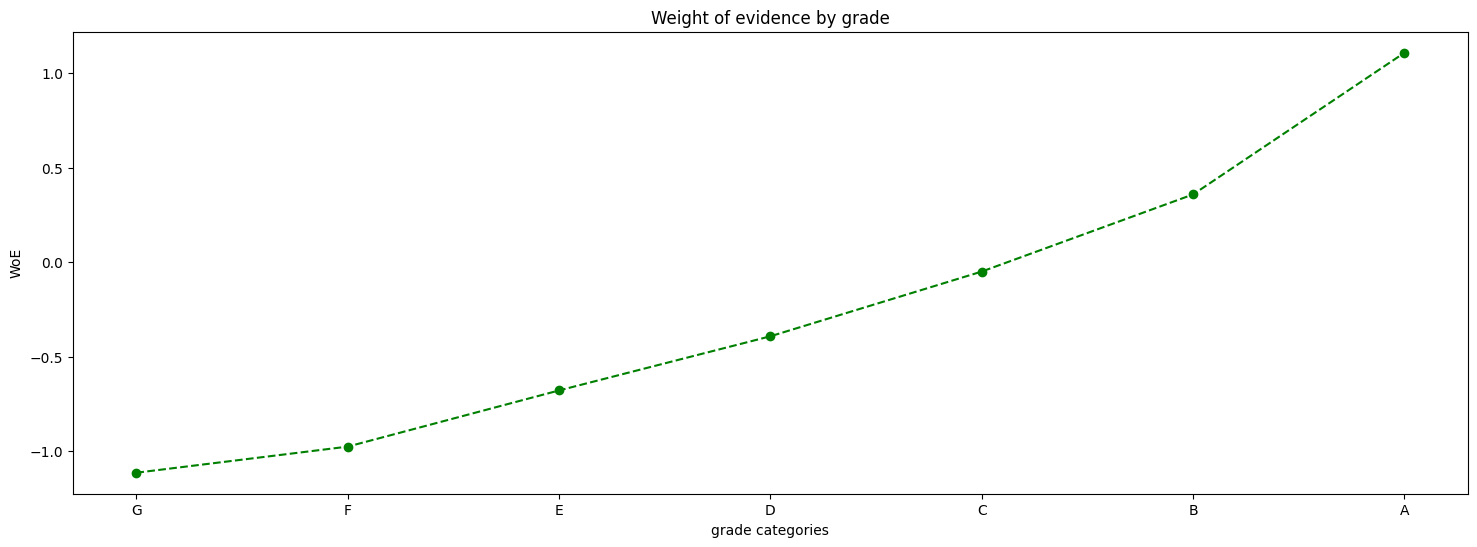

In [417]:
plot_woe(woe_grade)

# Discrete variable "home_ownership" 

In [418]:
# 'home_ownership'

# We calculate weight of evidence.
df_temp = woe_discrete(df_inputs_prepr, 'home_ownership', df_targets_prepr)

display(df_temp)

,home_ownership,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,OTHER,137,0.795620,0.000367,109.0,28.0,0.000328,0.000687,-0.738602,NaN,NaN,inf
1,NONE,40,0.850000,0.000107,34.0,6.0,0.000102,0.000147,-0.363144,0.054380,0.375458,inf
2,RENT,150599,0.873870,0.403720,131604.0,18995.0,0.396099,0.465815,-0.162123,0.023870,0.201021,inf
3,OWN,33295,0.892536,0.089256,29717.0,3578.0,0.089442,0.087743,0.019170,0.018666,0.181294,inf
4,MORTGAGE,188956,0.903835,0.506546,170785.0,18171.0,0.514026,0.445608,0.142834,0.011298,0.123663,inf
5,ANY,1,1.000000,0.000003,1.0,0.0,0.000003,0.000000,inf,0.096165,inf,inf


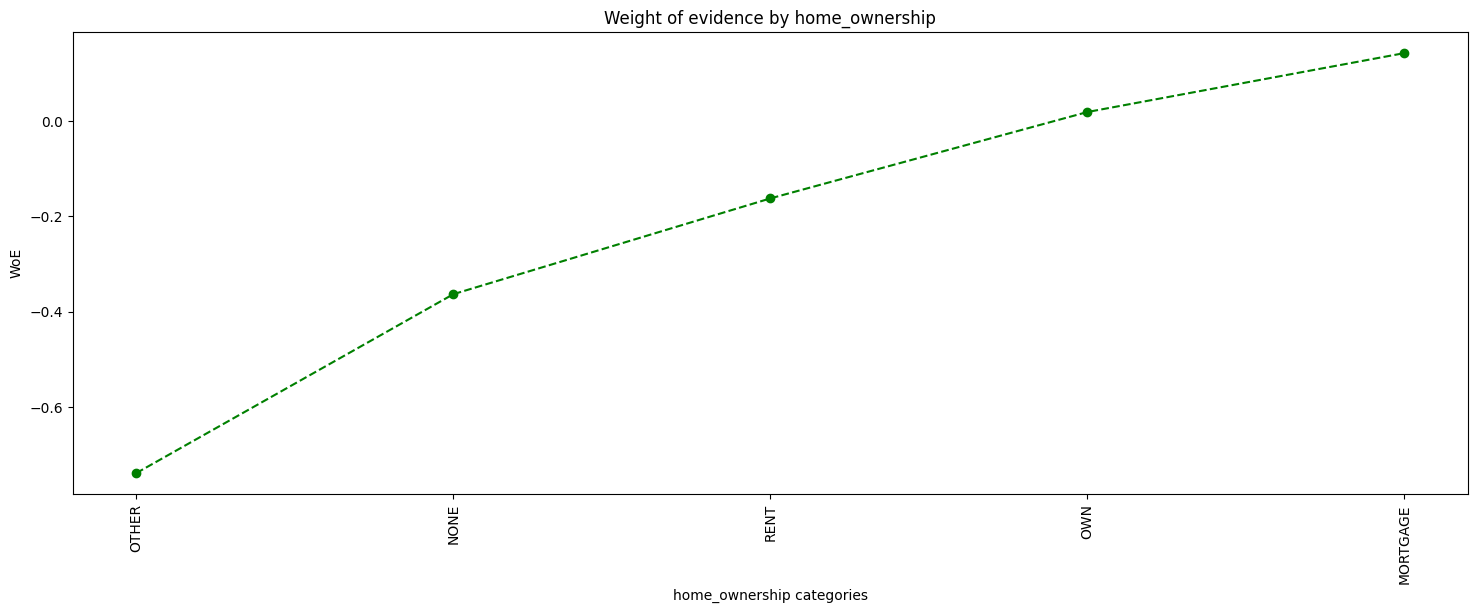

In [419]:
plot_woe(df_temp, 90)

In [420]:

# Create the new column
df_inputs_prepr['home_ownership:RENT_OTHER_NONE_ANY'] = df_inputs_prepr['home_ownership'].apply(
    lambda x: 1 if x in ['RENT', 'OTHER', 'NONE', 'ANY'] else 0)

In [421]:
df_inputs_prepr

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,inq_fi,total_cu_tl,inq_last_12m,emp_length_int,earliest_cr_line_date,months_since_earliest_cr_line,term_int,issue_d_dates,mths_since_inssue_d,home_ownership:RENT_OTHER_NONE_ANY
427211,427211,12796369,14818505,24000,24000,24000.0,36 months,8.90,762.08,A,...,NaN,NaN,NaN,3.0,1986-12-01,416.0,36,2014-03-01,85,0
206088,206088,1439740,1691948,10000,10000,10000.0,36 months,14.33,343.39,C,...,NaN,NaN,NaN,6.0,1997-12-01,282.0,36,2012-08-01,104,0
136020,136020,5214749,6556909,20425,20425,20425.0,36 months,8.90,648.56,A,...,NaN,NaN,NaN,10.0,1991-07-01,361.0,36,2013-06-01,94,0
412305,412305,13827698,15890016,17200,17200,17200.0,36 months,16.59,609.73,D,...,NaN,NaN,NaN,7.0,1998-10-01,272.0,36,2014-04-01,84,1
36159,36159,422455,496525,8400,8400,7450.0,36 months,12.84,282.40,C,...,NaN,NaN,NaN,5.0,1998-07-01,275.0,36,2009-07-01,141,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,259178,34392215,37055507,5000,5000,5000.0,36 months,8.67,158.24,B,...,NaN,NaN,NaN,3.0,1995-06-01,313.0,36,2014-11-01,77,0
365838,365838,19345890,21548652,20000,20000,20000.0,36 months,12.49,668.98,B,...,NaN,NaN,NaN,10.0,2003-11-01,210.0,36,2014-06-01,82,1
131932,131932,5145550,6467765,19200,19200,19175.0,36 months,14.09,657.06,B,...,NaN,NaN,NaN,10.0,2004-09-01,200.0,36,2013-06-01,94,1
146867,146867,4374922,5607101,15500,15500,15500.0,36 months,11.14,508.48,B,...,NaN,NaN,NaN,10.0,1997-01-01,294.0,36,2013-04-01,96,0


# Discrete variable "addr_state" 

In [422]:
df_inputs_prepr['addr_state'].unique()

array(['SC', 'NJ', 'GA', 'MA', 'CA', 'IL', 'NC', 'NY', 'TX', 'CT', 'FL',
       'VA', 'UT', 'AZ', 'MD', 'WI', 'MI', 'CO', 'TN', 'IN', 'AL', 'NV',
       'MT', 'RI', 'OR', 'MN', 'KS', 'AK', 'PA', 'OH', 'WA', 'KY', 'OK',
       'MO', 'NM', 'HI', 'WV', 'LA', 'VT', 'AR', 'DC', 'SD', 'NH', 'WY',
       'MS', 'DE', 'IA', 'NE', 'ID', 'ME'], dtype=object)

In [423]:
# We calculate weight of evidence.
df_temp = woe_discrete(df_inputs_prepr, 'addr_state', df_targets_prepr)
display(df_temp)

,addr_state,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,NE,13,0.461538,0.000035,6.0,7.0,0.000018,0.000172,-2.251896,NaN,NaN,inf
1,IA,13,0.769231,0.000035,10.0,3.0,0.000030,0.000074,-0.893772,0.307692,1.358123,inf
2,NV,5221,0.864585,0.013996,4514.0,707.0,0.013586,0.017338,-0.243837,0.095355,0.649935,inf
3,FL,25211,0.875808,0.067585,22080.0,3131.0,0.066456,0.076782,-0.144425,0.011223,0.099411,inf
4,HI,2001,0.877061,0.005364,1755.0,246.0,0.005282,0.006033,-0.132852,0.001253,0.011573,inf
5,AL,4671,0.877328,0.012522,4098.0,573.0,0.012334,0.014052,-0.130376,0.000267,0.002476,inf
6,NM,2075,0.883373,0.005563,1833.0,242.0,0.005517,0.005935,-0.072973,0.006045,0.057403,inf
7,VA,11366,0.883864,0.030470,10046.0,1320.0,0.030236,0.032370,-0.068202,0.000491,0.004771,inf
8,NY,32211,0.883984,0.086350,28474.0,3737.0,0.085701,0.091643,-0.067037,0.000120,0.001165,inf
9,OK,3284,0.884287,0.008804,2904.0,380.0,0.008740,0.009319,-0.064072,0.000304,0.002965,inf


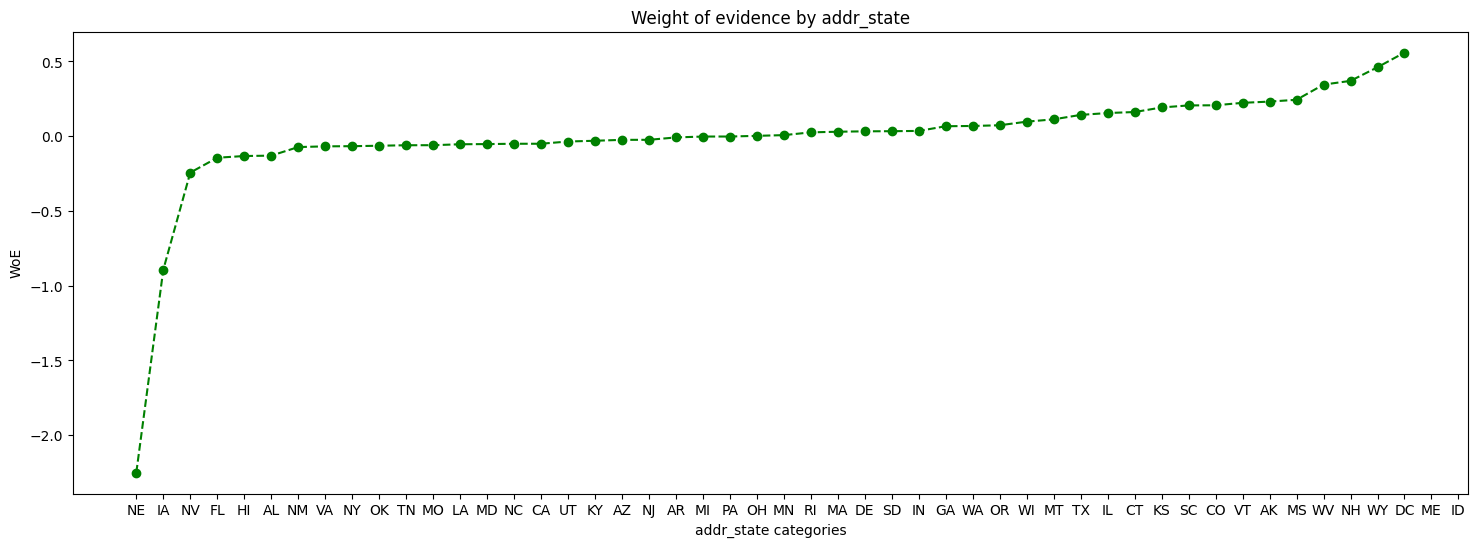

In [424]:
# We plot the weight of evidence values.
plot_woe(df_temp)

In [425]:
df_inputs_prepr['addr_state'].values

array(['SC', 'NJ', 'GA', ..., 'NJ', 'MA', 'FL'], dtype=object)

In [426]:
if ['addr_state:ND'] in df_inputs_prepr.columns.values:
    pass
else:
    df_inputs_prepr['addr_state:ND'] = 0

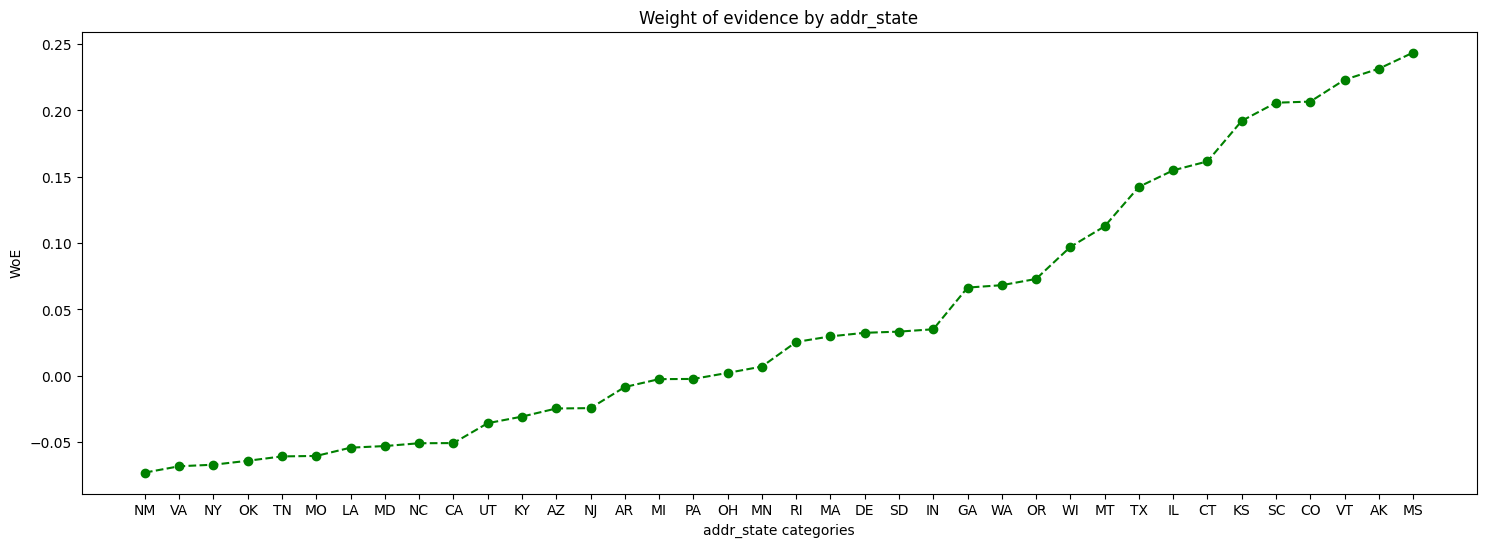

In [427]:
plot_woe(df_temp.iloc[6: -6, : ])

In [428]:
state_groups = {
    'addr_state:ND_NE_IA_NV_FL_HI_AL': ['ND', 'NE', 'IA', 'NV', 'FL', 'HI', 'AL'],
    'addr_state:NM_VA': ['NM', 'VA'],
    'addr_state:OK_TN_MO_LA_MD_NC': ['OK', 'TN', 'MO', 'LA', 'MD', 'NC'],
    'addr_state:UT_KY_AZ_NJ': ['UT', 'KY', 'AZ', 'NJ'],
    'addr_state:AR_MI_PA_OH_MN': ['AR', 'MI', 'PA', 'OH', 'MN'],
    'addr_state:RI_MA_DE_SD_IN': ['RI', 'MA', 'DE', 'SD', 'IN'],
    'addr_state:GA_WA_OR': ['GA', 'WA', 'OR'],
    'addr_state:WI_MT': ['WI', 'MT'],
    'addr_state:IL_CT': ['IL', 'CT'],
    'addr_state:KS_SC_CO_VT_AK_MS': ['KS', 'SC', 'CO', 'VT', 'AK', 'MS'],
    'addr_state:WV_NH_WY_DC_ME_ID': ['WV', 'NH', 'WY', 'DC', 'ME', 'ID']
}

# Create the new columns based on the state groups
for col_name, states in state_groups.items():
    df_inputs_prepr[col_name] = df_inputs_prepr['addr_state'].apply(lambda x: 1 if x in states else 0)

In [429]:
df_inputs_prepr

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,addr_state:NM_VA,addr_state:OK_TN_MO_LA_MD_NC,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID
427211,427211,12796369,14818505,24000,24000,24000.0,36 months,8.90,762.08,A,...,0,0,0,0,0,0,0,0,1,0
206088,206088,1439740,1691948,10000,10000,10000.0,36 months,14.33,343.39,C,...,0,0,1,0,0,0,0,0,0,0
136020,136020,5214749,6556909,20425,20425,20425.0,36 months,8.90,648.56,A,...,0,0,0,0,0,1,0,0,0,0
412305,412305,13827698,15890016,17200,17200,17200.0,36 months,16.59,609.73,D,...,0,0,0,0,1,0,0,0,0,0
36159,36159,422455,496525,8400,8400,7450.0,36 months,12.84,282.40,C,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,259178,34392215,37055507,5000,5000,5000.0,36 months,8.67,158.24,B,...,0,0,1,0,0,0,0,0,0,0
365838,365838,19345890,21548652,20000,20000,20000.0,36 months,12.49,668.98,B,...,0,0,0,0,0,0,0,0,0,0
131932,131932,5145550,6467765,19200,19200,19175.0,36 months,14.09,657.06,B,...,0,0,1,0,0,0,0,0,0,0
146867,146867,4374922,5607101,15500,15500,15500.0,36 months,11.14,508.48,B,...,0,0,0,0,1,0,0,0,0,0


In [430]:
df_temp = woe_discrete(df_inputs_prepr, 'verification_status', df_targets_prepr)
display(df_temp)

,verification_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,Verified,134414,0.872781,0.360332,117314.0,17100.0,0.353090,0.419344,-0.171969,NaN,NaN,0.020384
1,Source Verified,120030,0.895918,0.321772,107537.0,12493.0,0.323663,0.306366,0.054922,0.023137,0.226891,0.020384
2,Not Verified,118584,0.905679,0.317896,107399.0,11185.0,0.323248,0.274290,0.164232,0.009761,0.109311,0.020384


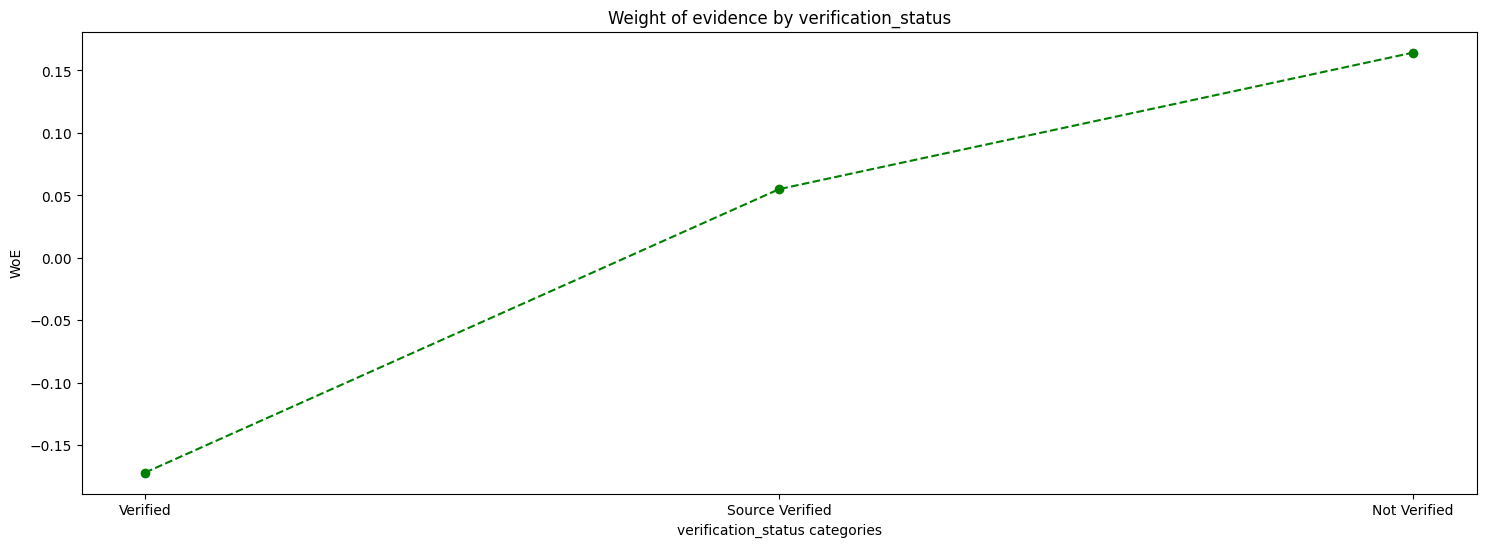

In [431]:
# We plot the weight of evidence values.
plot_woe(df_temp)

# Discrete variable "purpose" feature

In [432]:
df_temp = woe_discrete(df_inputs_prepr, 'purpose', df_targets_prepr)

display(df_temp)

,purpose,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,small_business,5582,0.786098,0.014964,4388.0,1194.0,0.013207,0.029280,-0.796180,NaN,NaN,0.035418
1,educational,333,0.801802,0.000893,267.0,66.0,0.000804,0.001619,-0.700151,0.015704,0.096029,0.035418
2,moving,2392,0.839465,0.006412,2008.0,384.0,0.006044,0.009417,-0.443493,0.037663,0.256658,0.035418
3,house,1830,0.860109,0.004906,1574.0,256.0,0.004737,0.006278,-0.281547,0.020644,0.161946,0.035418
4,other,18884,0.862264,0.050624,16283.0,2601.0,0.049008,0.063784,-0.263519,0.002155,0.018028,0.035418
5,renewable_energy,281,0.864769,0.000753,243.0,38.0,0.000731,0.000932,-0.242270,0.002504,0.021250,0.035418
6,medical,3684,0.868350,0.009876,3199.0,485.0,0.009628,0.011894,-0.211300,0.003581,0.030969,0.035418
7,wedding,1887,0.881823,0.005059,1664.0,223.0,0.005008,0.005469,-0.087937,0.013473,0.123363,0.035418
8,vacation,1991,0.882471,0.005337,1757.0,234.0,0.005288,0.005738,-0.081703,0.000648,0.006234,0.035418
9,debt_consolidation,219183,0.886884,0.587578,194390.0,24793.0,0.585071,0.607999,-0.038440,0.004413,0.043263,0.035418


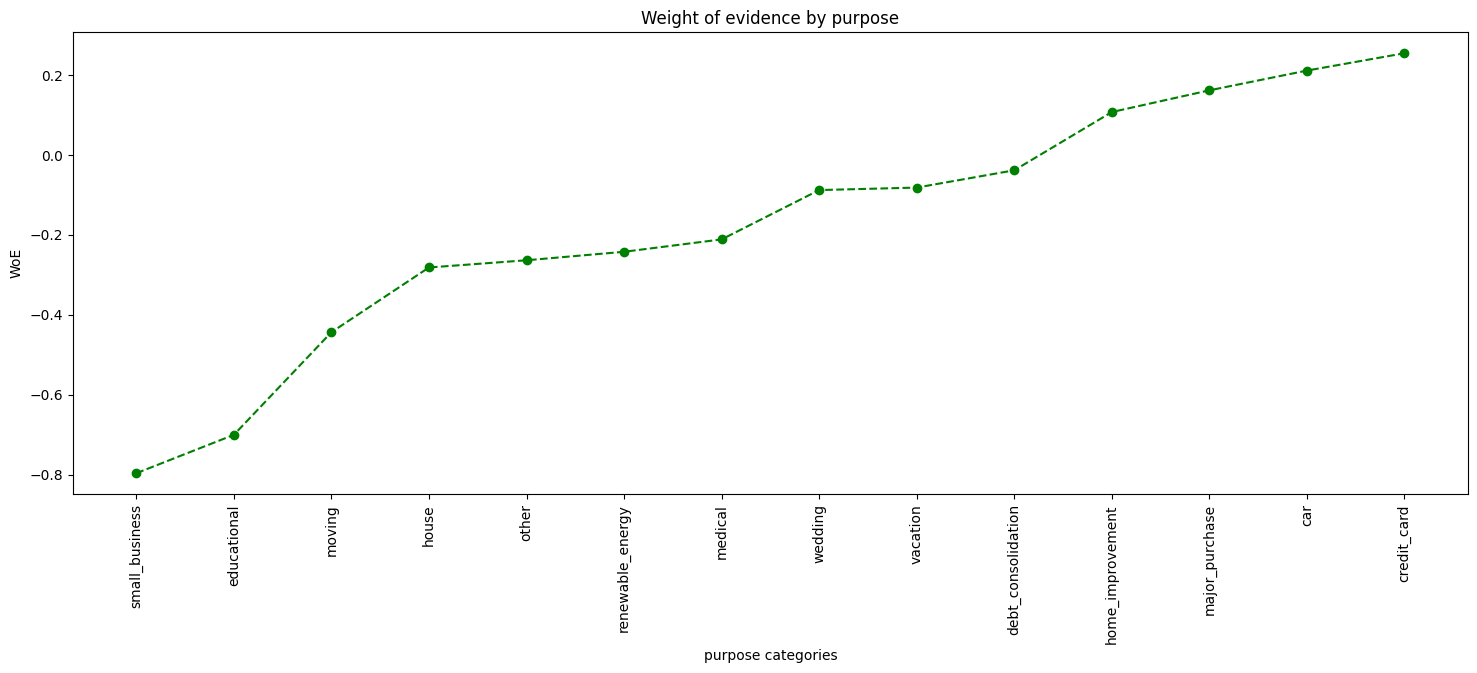

In [433]:
plot_woe(df_temp, 90)
# We plot the weight of evidence values.

In [434]:
# We combine 'educational', 'small_business', 'wedding', 'renewable_energy', 'moving', 'house' in one category: 'educ__sm_b__wedd__ren_en__mov__house'.
# We combine 'other', 'medical', 'vacation' in one category: 'oth__med__vacation'.
# We combine 'major_purchase', 'car', 'home_improvement' in one category: 'major_purch__car__home_impr'.
# We leave 'debt_consolidtion' in a separate category.
# We leave 'credit_card' in a separate category.
# 'educ__sm_b__wedd__ren_en__mov__house' will be the reference category.
purpose_groups = {
    'educ__sm_b__wedd__ren_en__mov__house': ['educational', 'small_business', 'wedding', 'renewable_energy', 'moving', 'house'],
    'oth__med__vacation': ['other', 'medical', 'vacation'],
    'major_purch__car__home_impr': ['major_purchase', 'car', 'home_improvement']
}
for group, purposes in purpose_groups.items():
    df_inputs_prepr[group] = df_inputs_prepr['purpose'].apply(lambda x: 1 if x in purposes else 0)

# Discrete variable  "initial_list_status" 

In [435]:
# 'initial_list_status'
df_temp = woe_discrete(df_inputs_prepr, 'initial_list_status', df_targets_prepr)
df_temp

,initial_list_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,f,242514,0.879694,0.650123,213338.0,29176.0,0.642101,0.715484,-0.108214,NaN,NaN,0.02478
1,w,130514,0.911105,0.349877,118912.0,11602.0,0.357899,0.284516,0.229461,0.031412,0.337675,0.02478


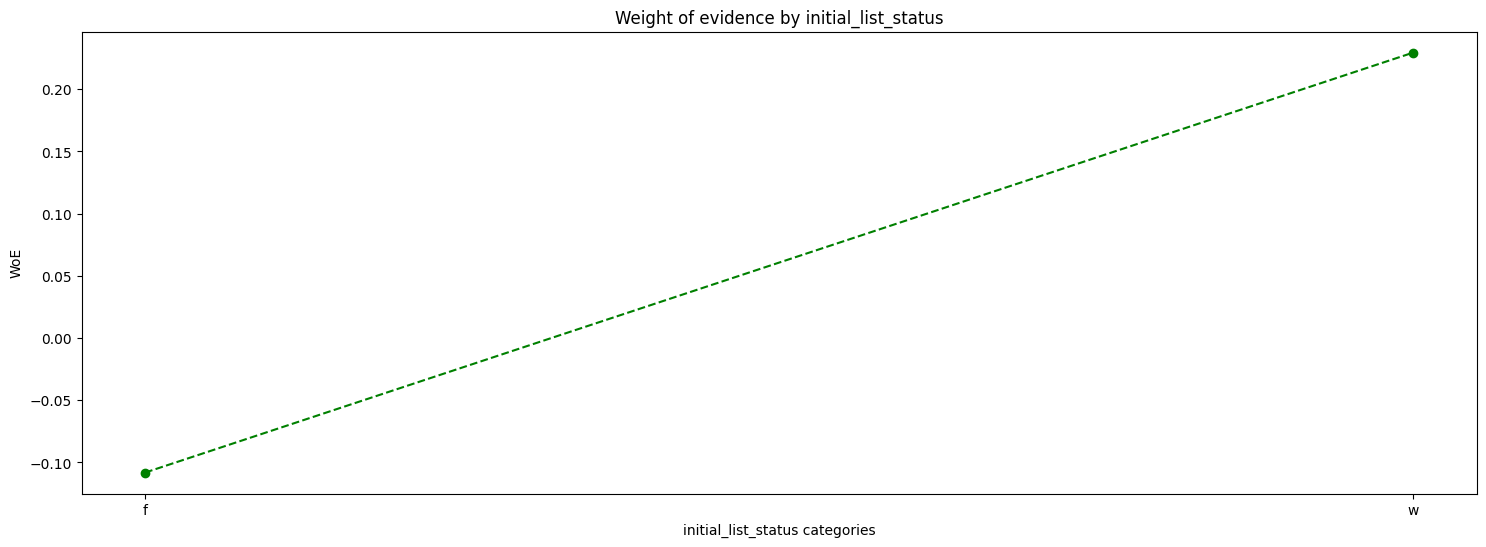

In [436]:
plot_woe(df_temp)
# We plot the weight of evidence values.

# Automating continuous variables

In [437]:
# WoE function for ordered discrete and continuous variables
def woe_ordered_continuous(df, discrete_variabe_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variabe_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    #df = df.sort_values(['WoE'])
    #df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df
# Here we define a function similar to the one above, ...
# ... with one slight difference: we order the results by the values of a different column.
# The function takes 3 arguments: a dataframe, a string, and a dataframe. The function returns a dataframe as a result.

In [438]:
df_inputs_prepr['term_int'].unique()

array([36, 60])

In [439]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'term_int', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,term_int,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,36,270419,0.902995,0.724929,244187.0,26232.0,0.73495,0.643288,0.133209,NaN,NaN,0.039434
1,60,102609,0.858239,0.275071,88063.0,14546.0,0.26505,0.356712,-0.297009,0.044756,0.430218,0.039434


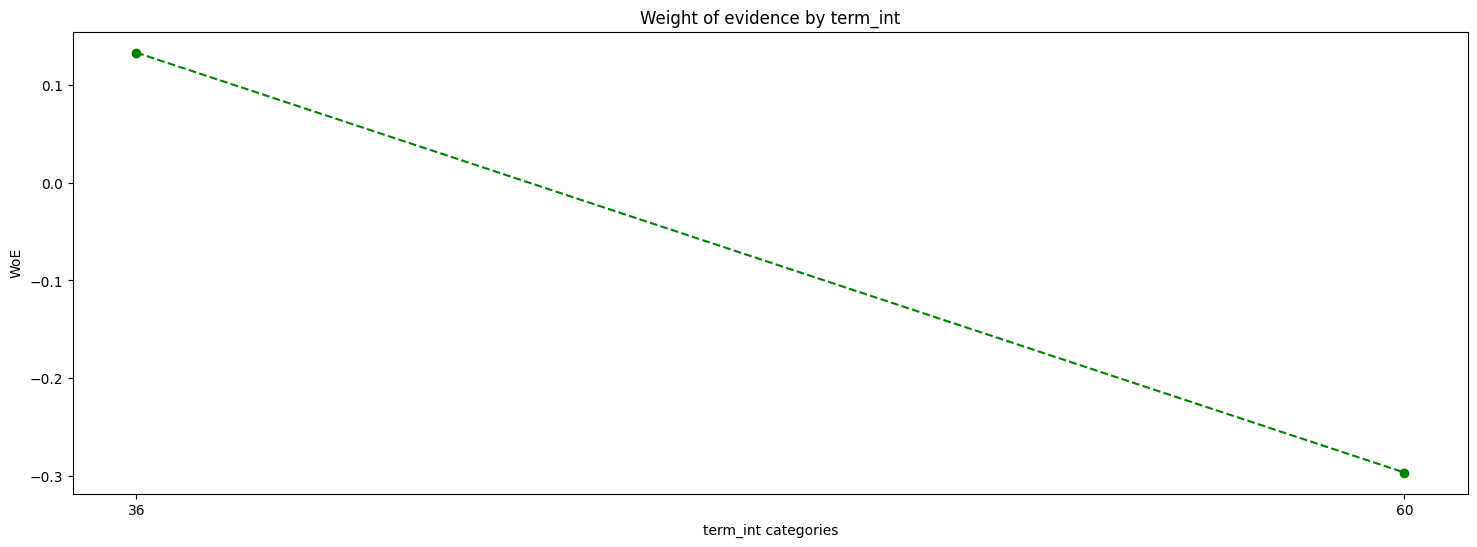

In [440]:
plot_woe(df_temp)
# We plot the weight of evidence values.

In [441]:
# Leave as is.
# '60' will be the reference category.
df_inputs_prepr['term:36'] = np.where((df_inputs_prepr['term_int'] == 36), 1, 0)
df_inputs_prepr['term:60'] = np.where((df_inputs_prepr['term_int'] == 60), 1, 0)

In [442]:
df_inputs_prepr

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,educ__sm_b__wedd__ren_en__mov__house,oth__med__vacation,major_purch__car__home_impr,term:36,term:60
427211,427211,12796369,14818505,24000,24000,24000.0,36 months,8.90,762.08,A,...,0,0,0,1,0,0,0,0,1,0
206088,206088,1439740,1691948,10000,10000,10000.0,36 months,14.33,343.39,C,...,0,0,0,0,0,0,0,0,1,0
136020,136020,5214749,6556909,20425,20425,20425.0,36 months,8.90,648.56,A,...,1,0,0,0,0,0,0,0,1,0
412305,412305,13827698,15890016,17200,17200,17200.0,36 months,16.59,609.73,D,...,0,0,0,0,0,0,0,0,1,0
36159,36159,422455,496525,8400,8400,7450.0,36 months,12.84,282.40,C,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,259178,34392215,37055507,5000,5000,5000.0,36 months,8.67,158.24,B,...,0,0,0,0,0,0,0,0,1,0
365838,365838,19345890,21548652,20000,20000,20000.0,36 months,12.49,668.98,B,...,0,0,0,0,0,0,0,0,1,0
131932,131932,5145550,6467765,19200,19200,19175.0,36 months,14.09,657.06,B,...,0,0,0,0,0,0,0,0,1,0
146867,146867,4374922,5607101,15500,15500,15500.0,36 months,11.14,508.48,B,...,0,0,0,0,0,0,0,0,1,0


In [443]:
df_inputs_prepr['emp_length_int'].unique()

array([ 3.,  6., 10.,  7.,  5.,  0.,  2.,  9.,  1.,  8.,  4.])

In [444]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'emp_length_int', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,emp_length_int,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,45720,0.876400,0.122565,40069.0,5651.0,0.120599,0.138580,-0.138975,NaN,NaN,0.006506
1,1.0,23654,0.886996,0.063411,20981.0,2673.0,0.063148,0.065550,-0.037329,0.010596,0.101645,0.006506
2,2.0,33078,0.890955,0.088674,29471.0,3607.0,0.088701,0.088455,0.002785,0.003959,0.040114,0.006506
3,3.0,29205,0.890772,0.078292,26015.0,3190.0,0.078299,0.078228,0.000907,0.000183,0.001878,0.006506
4,4.0,22468,0.890644,0.060231,20011.0,2457.0,0.060229,0.060253,-0.000404,0.000128,0.001311,0.006506
5,5.0,24602,0.884725,0.065952,21766.0,2836.0,0.065511,0.069547,-0.059790,0.005920,0.059387,0.006506
6,6.0,20887,0.883899,0.055993,18462.0,2425.0,0.055567,0.059468,-0.067862,0.000826,0.008071,0.006506
7,7.0,21049,0.887453,0.056427,18680.0,2369.0,0.056223,0.058095,-0.032759,0.003554,0.035102,0.006506
8,8.0,17853,0.889878,0.047860,15887.0,1966.0,0.047816,0.048212,-0.008245,0.002425,0.024515,0.006506
9,9.0,14267,0.886662,0.038246,12650.0,1617.0,0.038074,0.039654,-0.040660,0.003217,0.032416,0.006506


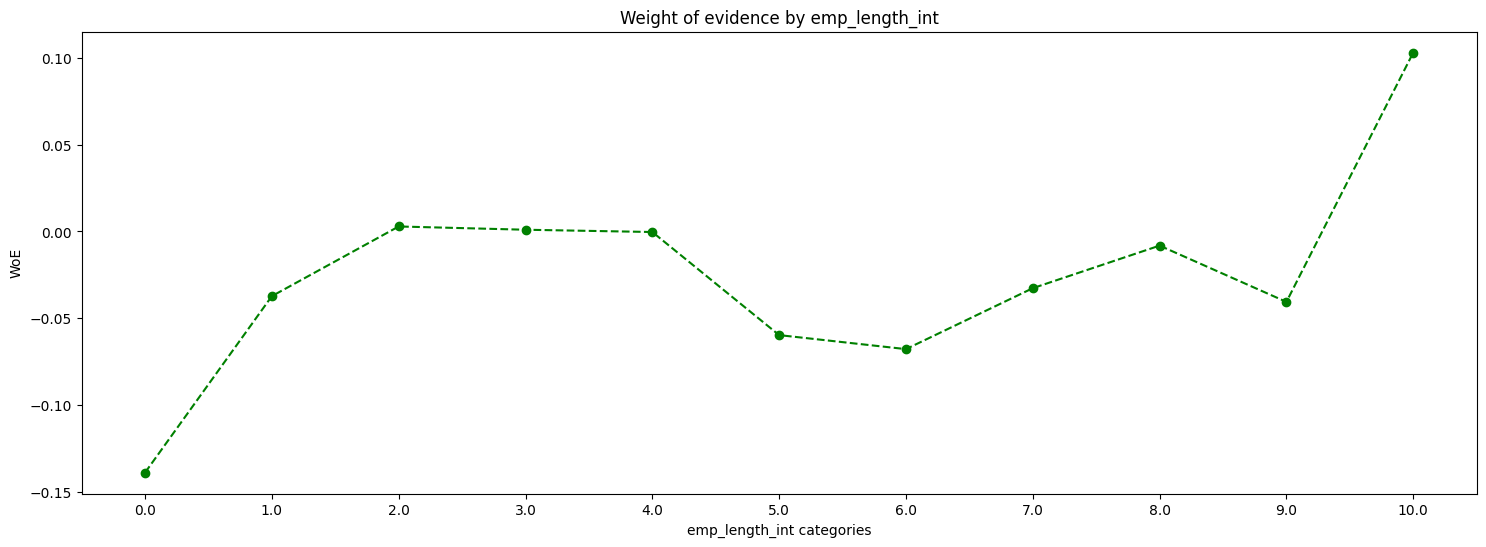

In [445]:
plot_woe(df_temp)

In [446]:
df_inputs_prepr['emp_length:0'] = np.where(df_inputs_prepr['emp_length_int'].isin([0]), 1, 0)
df_inputs_prepr['emp_length:1'] = np.where(df_inputs_prepr['emp_length_int'].isin([1]), 1, 0)
df_inputs_prepr['emp_length:2-4'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(2, 5)), 1, 0) # 2,3,4
df_inputs_prepr['emp_length:5-6'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(5, 7)), 1, 0)
df_inputs_prepr['emp_length:7-9'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(7, 10)), 1, 0)
df_inputs_prepr['emp_length:10'] = np.where(df_inputs_prepr['emp_length_int'].isin([10]), 1, 0)

# Continuous variables "mths_since_issue_d" 

In [447]:
df_inputs_prepr['mths_since_inssue_d'].unique()

array([ 85, 104,  94,  84, 141,  77, 131,  93,  82,  97,  98,  83,  80,
        91,  99, 154,  90, 102,  89,  87,  88,  81,  78, 106, 109, 127,
        86, 116, 103,  79, 101, 129, 105,  96, 119, 108,  92, 100, 113,
       114, 110, 128, 121, 122,  95, 144, 123, 112, 125,  76, 111, 132,
       117, 107, 124, 126, 130, 157, 133, 135, 118, 115, 120, 136, 134,
       138, 145, 166, 146, 159, 151, 160, 155, 137, 142, 140, 163, 162,
       149, 158, 161, 165, 139, 156, 153, 150, 164, 148, 167, 152])

In [448]:
df_inputs_prepr['mths_since_inssue_d_factor'] = pd.cut(df_inputs_prepr['mths_since_inssue_d'],50)

In [449]:
df_inputs_prepr['mths_since_inssue_d_factor']

427211      (83.28, 85.1]
206088    (103.3, 105.12]
136020      (92.38, 94.2]
412305      (83.28, 85.1]
36159     (139.7, 141.52]
               ...       
259178    (75.909, 77.82]
365838     (81.46, 83.28]
131932      (92.38, 94.2]
146867      (94.2, 96.02]
121958      (92.38, 94.2]
Name: mths_since_inssue_d_factor, Length: 373028, dtype: category
Categories (50, interval[float64, right]): [(75.909, 77.82] < (77.82, 79.64] < (79.64, 81.46] < (81.46, 83.28] ... (159.72, 161.54] < (161.54, 163.36] < (163.36, 165.18] < (165.18, 167.0]]

In [450]:
df_temp = woe_ordered_continuous(df_inputs_prepr,'mths_since_inssue_d_factor',df_targets_prepr)

/var/folders/2h/rjm2fb_j53gb0nswwgx_xyfc0000gn/T/ipykernel_79302/539786113.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
/var/folders/2h/rjm2fb_j53gb0nswwgx_xyfc0000gn/T/ipykernel_79302/539786113.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)


In [451]:
df_temp

,mths_since_inssue_d_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(75.909, 77.82]",28170,0.942244,0.075517,26543.0,1627.0,0.079889,0.039899,0.694283,NaN,NaN,0.113081
1,"(77.82, 79.64]",39636,0.928424,0.106255,36799.0,2837.0,0.110757,0.069572,0.464979,0.013820,0.229305,0.113081
2,"(79.64, 81.46]",38614,0.917284,0.103515,35420.0,3194.0,0.106606,0.078327,0.308258,0.011140,0.156721,0.113081
3,"(81.46, 83.28]",29038,0.908603,0.077844,26384.0,2654.0,0.079410,0.065084,0.198945,0.008681,0.109313,0.113081
4,"(83.28, 85.1]",28367,0.901787,0.076045,25581.0,2786.0,0.076993,0.068321,0.119498,0.006815,0.079447,0.113081
5,"(85.1, 86.92]",12165,0.899301,0.032611,10940.0,1225.0,0.032927,0.030041,0.091740,0.002486,0.027758,0.113081
6,"(86.92, 88.74]",24451,0.898900,0.065547,21979.0,2472.0,0.066152,0.060621,0.087315,0.000401,0.004425,0.113081
7,"(88.74, 90.56]",22969,0.888328,0.061574,20404.0,2565.0,0.061412,0.062902,-0.023972,0.010572,0.111287,0.113081
8,"(90.56, 92.38]",20640,0.880523,0.055331,18174.0,2466.0,0.054700,0.060474,-0.100350,0.007804,0.076378,0.113081
9,"(92.38, 94.2]",18312,0.866863,0.049090,15874.0,2438.0,0.047777,0.059787,-0.224240,0.013660,0.123890,0.113081


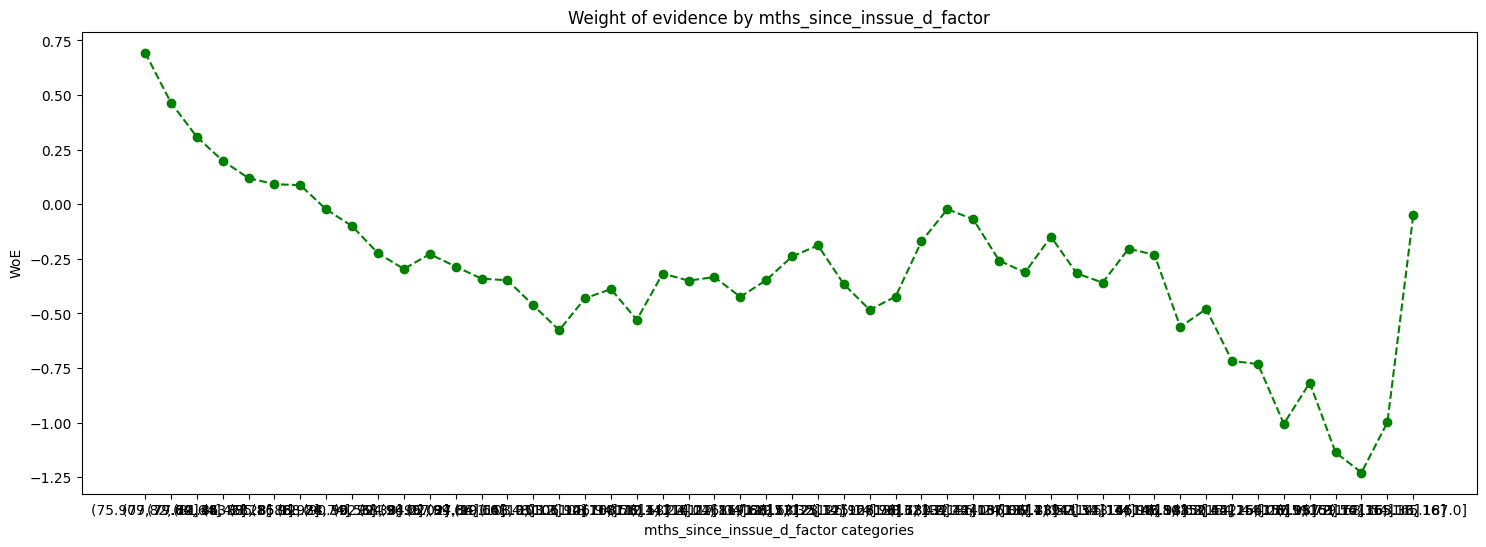

In [452]:
plot_woe(df_temp)

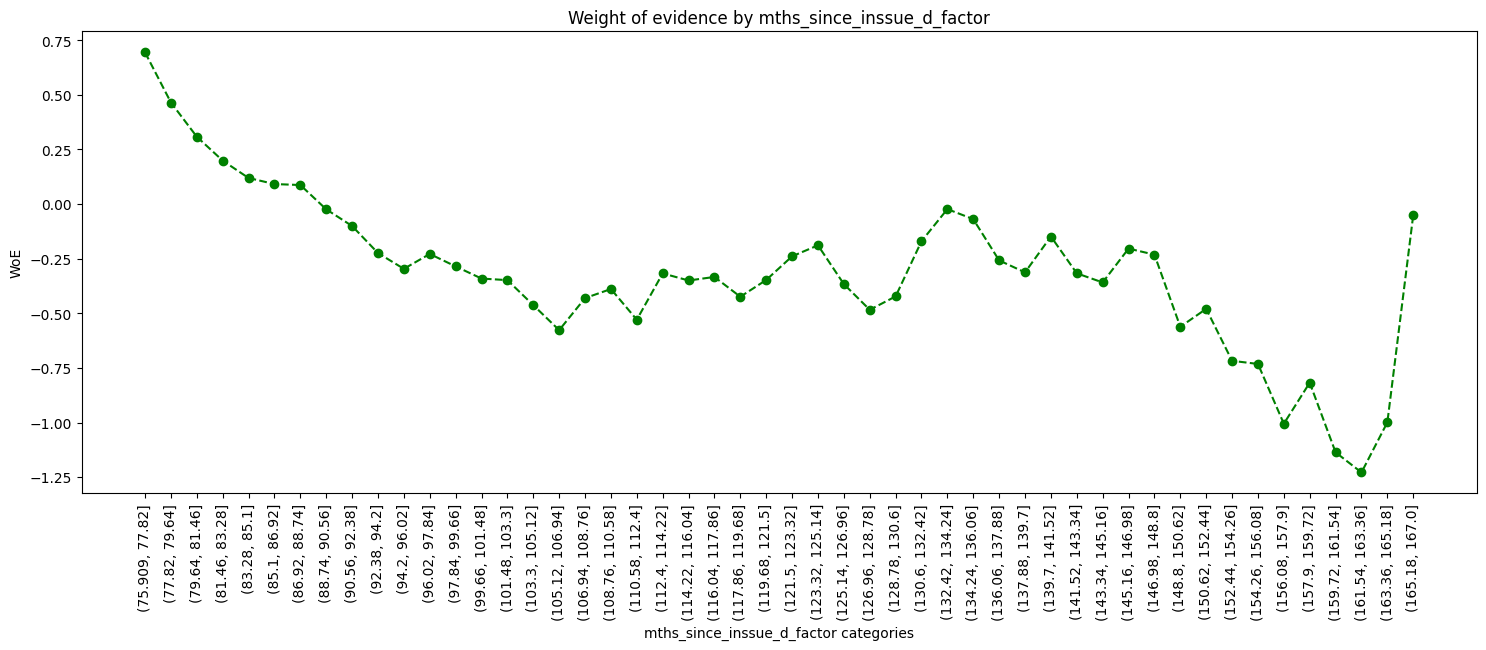

In [453]:
plot_woe(df_temp, 90)

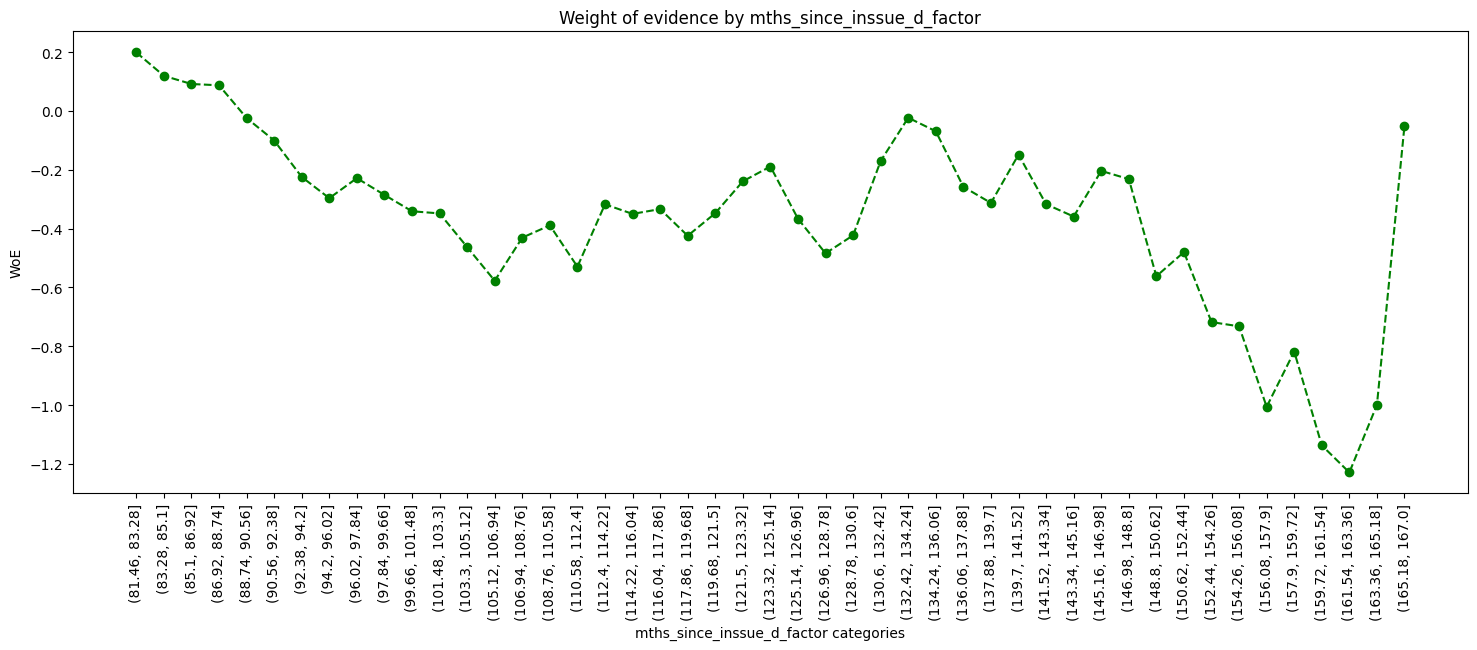

In [454]:
plot_woe(df_temp.iloc[3:,:],90)

# Continuous variable 'int_rate'

In [455]:
df_inputs_prepr['int_rate_factor'] = pd.cut(df_inputs_prepr['int_rate'],50)
df_temp = woe_ordered_continuous(df_inputs_prepr,'int_rate_factor',df_targets_prepr)

/var/folders/2h/rjm2fb_j53gb0nswwgx_xyfc0000gn/T/ipykernel_79302/539786113.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
/var/folders/2h/rjm2fb_j53gb0nswwgx_xyfc0000gn/T/ipykernel_79302/539786113.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)


In [456]:
df_temp

,int_rate_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(5.399, 5.833]",785,0.961783,0.002104,755.0,30.0,0.002272,0.000736,1.127775,NaN,NaN,0.343349
1,"(5.833, 6.246]",8459,0.980376,0.022677,8293.0,166.0,0.024960,0.004071,1.813434,0.018592,0.685659,0.343349
2,"(6.246, 6.658]",7826,0.971505,0.020980,7603.0,223.0,0.022883,0.005469,1.431381,0.008871,0.382053,0.343349
3,"(6.658, 7.071]",1816,0.973018,0.004868,1767.0,49.0,0.005318,0.001202,1.487473,0.001512,0.056092,0.343349
4,"(7.071, 7.484]",3143,0.976456,0.008426,3069.0,74.0,0.009237,0.001815,1.627297,0.003438,0.139824,0.343349
5,"(7.484, 7.897]",12581,0.962324,0.033727,12107.0,474.0,0.036439,0.011624,1.142587,0.014131,0.484710,0.343349
6,"(7.897, 8.31]",9687,0.949314,0.025969,9196.0,491.0,0.027678,0.012041,0.832335,0.013011,0.310252,0.343349
7,"(8.31, 8.722]",6594,0.965271,0.017677,6365.0,229.0,0.019157,0.005616,1.227103,0.015958,0.394768,0.343349
8,"(8.722, 9.135]",9539,0.937415,0.025572,8942.0,597.0,0.026913,0.014640,0.608852,0.027857,0.618250,0.343349
9,"(9.135, 9.548]",6681,0.963928,0.017910,6440.0,241.0,0.019383,0.005910,1.187742,0.026513,0.578889,0.343349


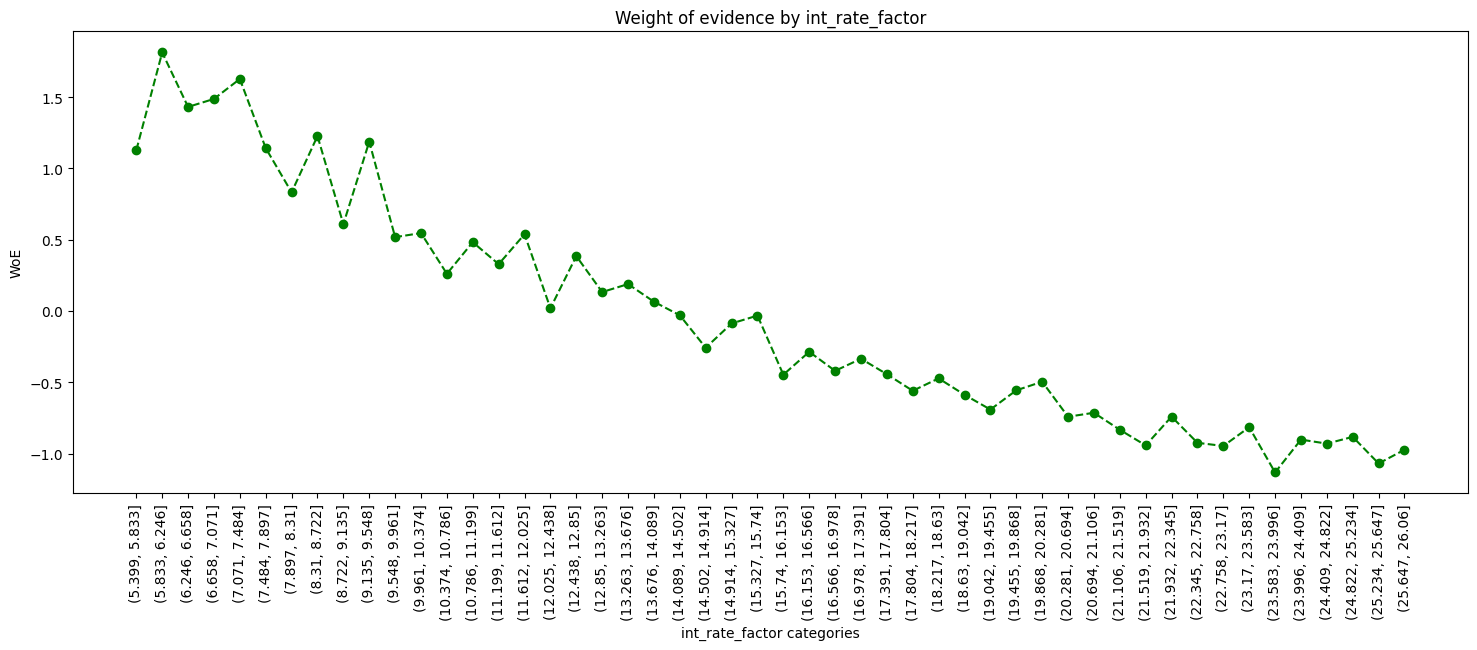

In [457]:
plot_woe(df_temp,90)

In [458]:
# '< 9.548', '9.548 - 12.025', '12.025 - 15.74', '15.74 - 20.281', '> 20.281'
df_inputs_prepr['int_rate:<9.548'] = np.where((df_inputs_prepr['int_rate'] <= 9.548), 1, 0)
df_inputs_prepr['int_rate:9.548-12.025'] = np.where((df_inputs_prepr['int_rate'] > 9.548) & (df_inputs_prepr['int_rate'] <= 12.025), 1, 0)
df_inputs_prepr['int_rate:12.025-15.74'] = np.where((df_inputs_prepr['int_rate'] > 12.025) & (df_inputs_prepr['int_rate'] <= 15.74), 1, 0)
df_inputs_prepr['int_rate:15.74-20.281'] = np.where((df_inputs_prepr['int_rate'] > 15.74) & (df_inputs_prepr['int_rate'] <= 20.281), 1, 0)
df_inputs_prepr['int_rate:>20.281'] = np.where((df_inputs_prepr['int_rate'] > 20.281), 1, 0)

# Continuous variable "funded_amnt"

In [459]:
df_inputs_prepr['funded_amnt_factor'] = pd.cut(df_inputs_prepr['funded_amnt'],50)
df_temp = woe_ordered_continuous(df_inputs_prepr,'funded_amnt_factor',df_targets_prepr)
df_temp

/var/folders/2h/rjm2fb_j53gb0nswwgx_xyfc0000gn/T/ipykernel_79302/539786113.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
/var/folders/2h/rjm2fb_j53gb0nswwgx_xyfc0000gn/T/ipykernel_79302/539786113.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)


,funded_amnt_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(465.5, 1190.0]",1224,0.905229,0.003281,1108.0,116.0,0.003335,0.002845,0.158977,NaN,NaN,0.014139
1,"(1190.0, 1880.0]",3028,0.903897,0.008117,2737.0,291.0,0.008238,0.007136,0.143549,0.001332,0.015427,0.014139
2,"(1880.0, 2570.0]",6018,0.893819,0.016133,5379.0,639.0,0.016190,0.015670,0.032608,0.010078,0.110941,0.014139
3,"(2570.0, 3260.0]",7248,0.889073,0.019430,6444.0,804.0,0.019395,0.019717,-0.016440,0.004746,0.049048,0.014139
4,"(3260.0, 3950.0]",4751,0.891602,0.012736,4236.0,515.0,0.012749,0.012629,0.009463,0.002529,0.025902,0.014139
5,"(3950.0, 4640.0]",9023,0.890945,0.024189,8039.0,984.0,0.024196,0.024131,0.002689,0.000656,0.006774,0.014139
6,"(4640.0, 5330.0]",15903,0.892159,0.042632,14188.0,1715.0,0.042703,0.042057,0.015238,0.001213,0.012549,0.014139
7,"(5330.0, 6020.0]",17236,0.906069,0.046206,15617.0,1619.0,0.047004,0.039703,0.168806,0.013910,0.153568,0.014139
8,"(6020.0, 6710.0]",6914,0.887619,0.018535,6137.0,777.0,0.018471,0.019054,-0.031094,0.018449,0.199900,0.014139
9,"(6710.0, 7400.0]",11806,0.898018,0.031649,10602.0,1204.0,0.031910,0.029526,0.077648,0.010399,0.108742,0.014139


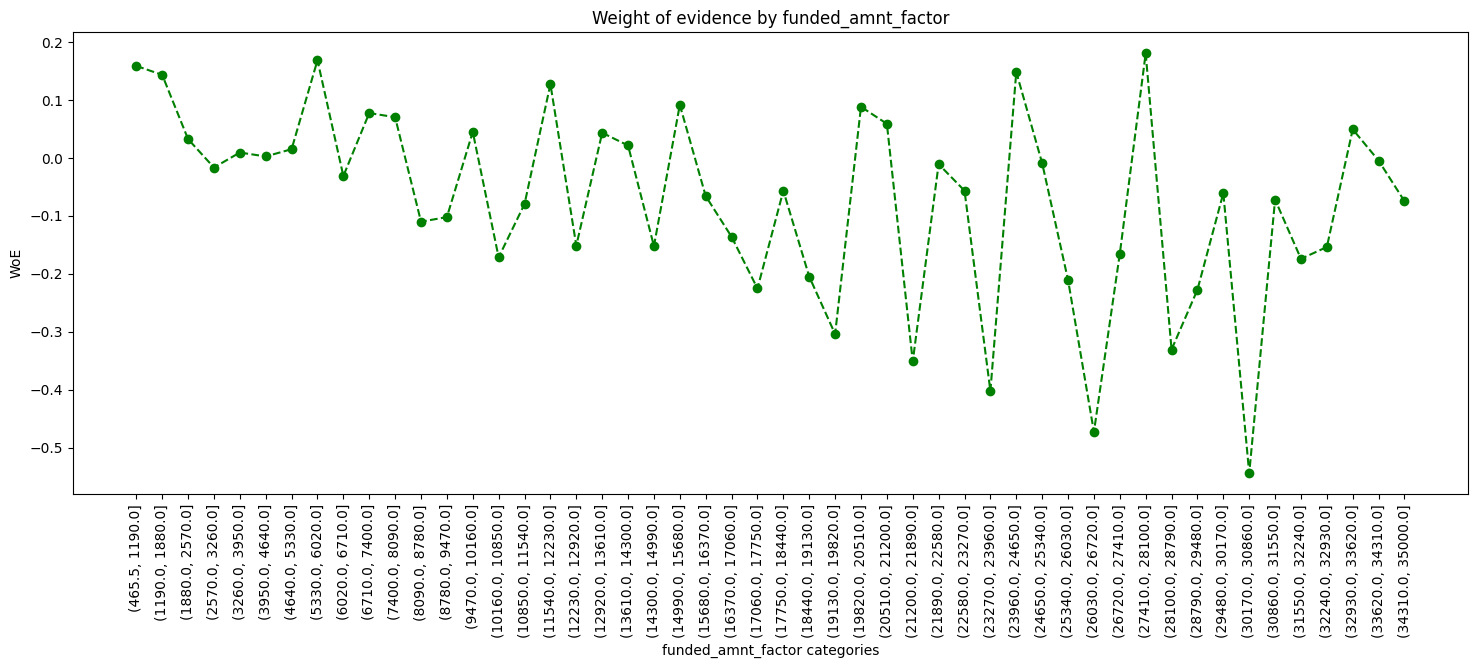

In [460]:
plot_woe(df_temp,90)

# Continuous variable "mths_since_earliest_cr_line"

In [467]:
df_inputs_prepr['months_since_earliest_cr_line'].describe()

count    373028.000000
mean        284.910950
std          87.832339
min           0.000000
25%         225.000000
50%         268.000000
75%         328.000000
max         635.000000
Name: months_since_earliest_cr_line, dtype: float64

In [472]:
# months_since_earliest_cr_line

# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_inputs_prepr['months_since_earliest_cr_line_factor'] = pd.cut(df_inputs_prepr['months_since_earliest_cr_line'], 50)

# We calculate weight of evidence.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'months_since_earliest_cr_line_factor', df_targets_prepr)
display(df_temp)

/var/folders/2h/rjm2fb_j53gb0nswwgx_xyfc0000gn/T/ipykernel_79302/539786113.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
/var/folders/2h/rjm2fb_j53gb0nswwgx_xyfc0000gn/T/ipykernel_79302/539786113.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)


,months_since_earliest_cr_line_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.635, 12.7]",24,0.875000,0.000064,21.0,3.0,0.000063,0.000074,-0.151835,NaN,NaN,inf
1,"(12.7, 25.4]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
2,"(25.4, 38.1]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
3,"(38.1, 50.8]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
4,"(50.8, 63.5]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
5,"(63.5, 76.2]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
6,"(76.2, 88.9]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
7,"(88.9, 101.6]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
8,"(101.6, 114.3]",9,1.000000,0.000024,9.0,0.0,0.000027,0.000000,inf,NaN,NaN,inf
9,"(114.3, 127.0]",1571,0.894335,0.004211,1405.0,166.0,0.004229,0.004071,0.038060,0.105665,inf,inf


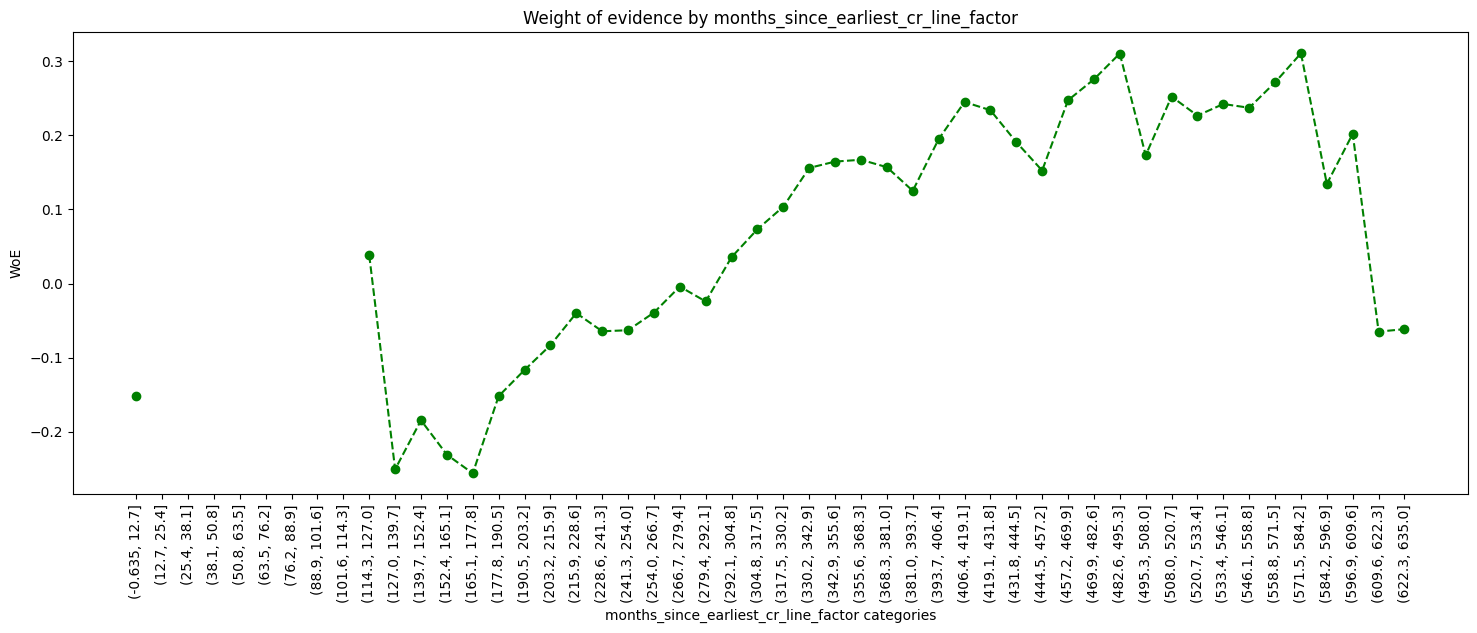

In [463]:
plot_woe(df_temp, 90)

# Continuous variable "installment"

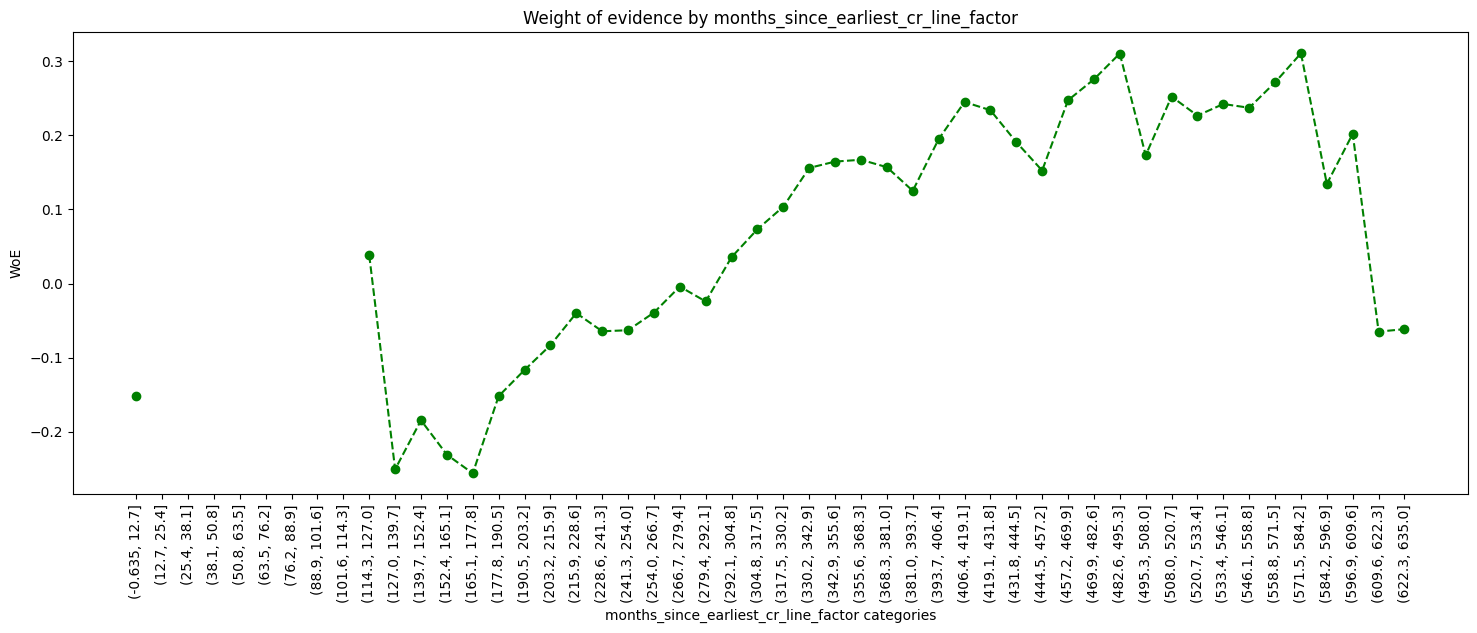

In [464]:
plot_woe(df_temp, 90)

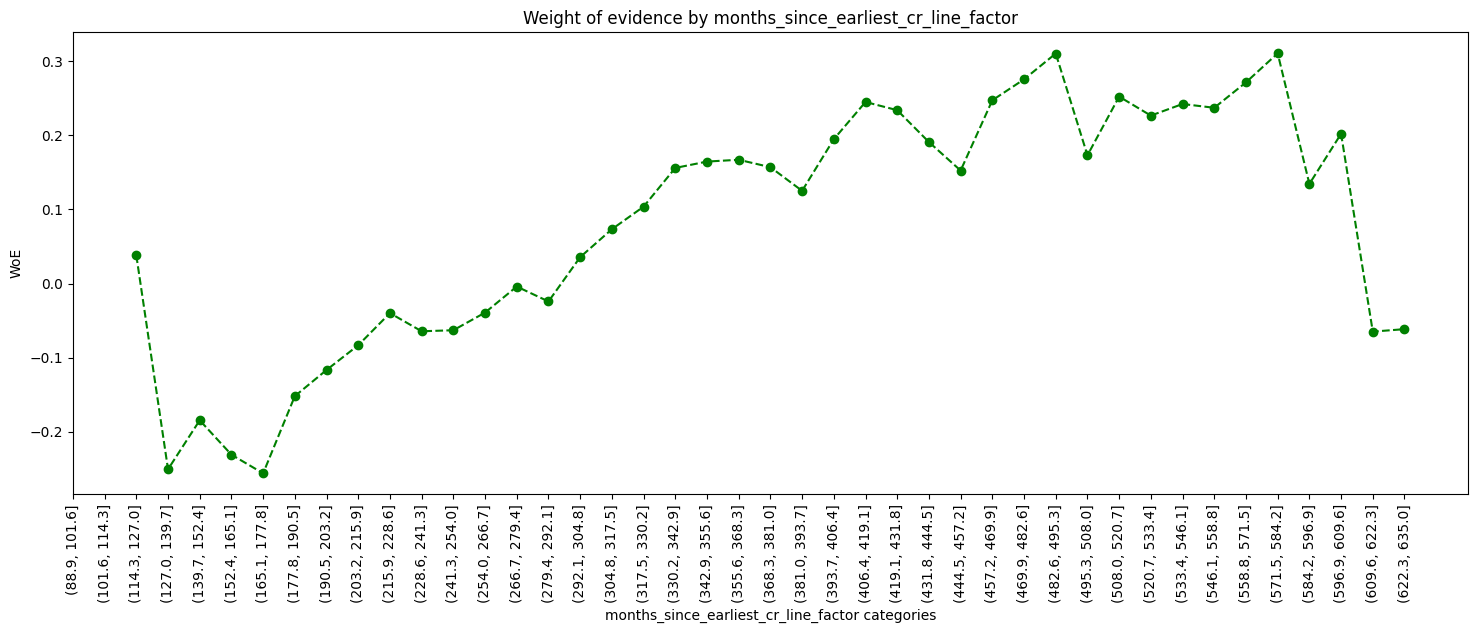

In [474]:
plot_woe(df_temp.iloc[6: , : ], 90)

In [477]:
df_inputs_prepr['months_since_earliest_cr_line:<140'] = np.where(df_inputs_prepr['months_since_earliest_cr_line'].isin(range(140)), 1, 0)
df_inputs_prepr['months_since_earliest_cr_line:141-164'] = np.where(df_inputs_prepr['months_since_earliest_cr_line'].isin(range(140, 165)), 1, 0)
df_inputs_prepr['months_since_earliest_cr_line:165-247'] = np.where(df_inputs_prepr['months_since_earliest_cr_line'].isin(range(165, 248)), 1, 0)
df_inputs_prepr['months_since_earliest_cr_line:248-270'] = np.where(df_inputs_prepr['months_since_earliest_cr_line'].isin(range(248, 271)), 1, 0)
df_inputs_prepr['months_since_earliest_cr_line:271-352'] = np.where(df_inputs_prepr['months_since_earliest_cr_line'].isin(range(271, 353)), 1, 0)
df_inputs_prepr['months_since_earliest_cr_line:>352'] = np.where(df_inputs_prepr['months_since_earliest_cr_line'].isin(range(353, int(df_inputs_prepr['months_since_earliest_cr_line'].max()))), 1, 0)

# Continuous variable "delinq_2yrs"

In [465]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'delinq_2yrs', df_targets_prepr)
display(df_temp)

,delinq_2yrs,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,306417,0.890499,0.821432,272864.0,33553.0,0.821261,0.822821,-0.001898,NaN,NaN,inf
1,1.0,44927,0.893249,0.120439,40131.0,4796.0,0.120786,0.117612,0.026622,0.002750,0.028520,inf
2,2.0,13118,0.889007,0.035166,11662.0,1456.0,0.035100,0.035706,-0.017102,0.004242,0.043724,inf
3,3.0,4550,0.883297,0.012197,4019.0,531.0,0.012096,0.013022,-0.073719,0.005711,0.056616,inf
4,4.0,1868,0.898822,0.005008,1679.0,189.0,0.005053,0.004635,0.086462,0.015526,0.160180,inf
5,5.0,966,0.881988,0.002590,852.0,114.0,0.002564,0.002796,-0.086357,0.016835,0.172819,inf
6,6.0,501,0.902196,0.001343,452.0,49.0,0.001360,0.001202,0.124117,0.020208,0.210474,inf
7,7.0,279,0.860215,0.000748,240.0,39.0,0.000722,0.000956,-0.280668,0.041981,0.404785,inf
8,8.0,148,0.905405,0.000397,134.0,14.0,0.000403,0.000343,0.161037,0.045190,0.441705,inf
9,9.0,89,0.887640,0.000239,79.0,10.0,0.000238,0.000245,-0.030882,0.017765,0.191920,inf


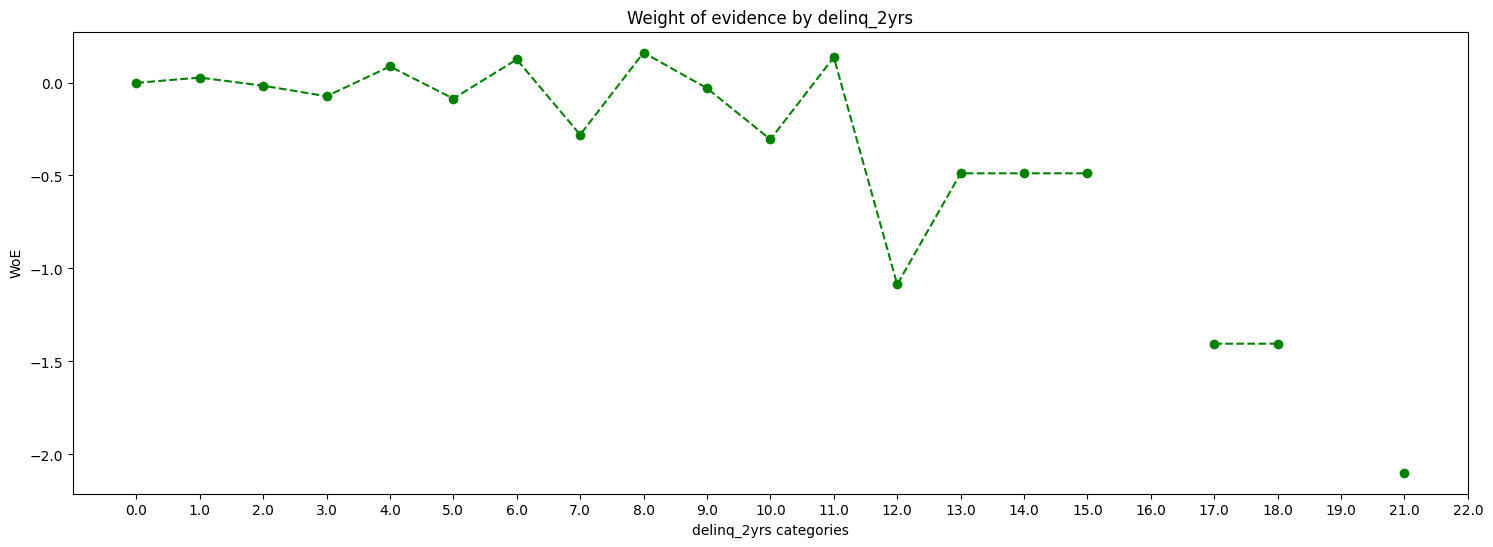

In [466]:
plot_woe(df_temp)

In [478]:
df_inputs_prepr['delinq_2yrs:0'] = np.where((df_inputs_prepr['delinq_2yrs'] == 0), 1, 0)
df_inputs_prepr['delinq_2yrs:1-3'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 1) & (df_inputs_prepr['delinq_2yrs'] <= 3), 1, 0)
df_inputs_prepr['delinq_2yrs:>=4'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 9), 1, 0)

# Continuous variable "inq_last_6mths"

In [479]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'inq_last_6mths', df_targets_prepr)
df_temp

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,inq_last_6mths,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,193232,0.908395,0.518009,175531.0,17701.0,0.528310,0.434082,0.196450,NaN,NaN,inf
1,1.0,104163,0.884950,0.279236,92179.0,11984.0,0.277439,0.293884,-0.057585,0.023446,0.254035,inf
2,2.0,46214,0.864197,0.123889,39938.0,6276.0,0.120205,0.153907,-0.247150,0.020753,0.189564,inf
3,3.0,20040,0.839671,0.053723,16827.0,3213.0,0.050646,0.078792,-0.441965,0.024526,0.194816,inf
4,4.0,5810,0.848365,0.015575,4929.0,881.0,0.014835,0.021605,-0.375911,0.008694,0.066054,inf
5,5.0,2217,0.824989,0.005943,1829.0,388.0,0.005505,0.009515,-0.547226,0.023376,0.171314,inf
6,6.0,977,0.788127,0.002619,770.0,207.0,0.002318,0.005076,-0.784073,0.036862,0.236848,inf
7,7.0,159,0.679245,0.000426,108.0,51.0,0.000325,0.001251,-1.347439,0.108882,0.563366,inf
8,8.0,101,0.643564,0.000271,65.0,36.0,0.000196,0.000883,-1.506877,0.035681,0.159437,inf
9,9.0,43,0.674419,0.000115,29.0,14.0,0.000087,0.000343,-1.369506,0.030854,0.137370,inf


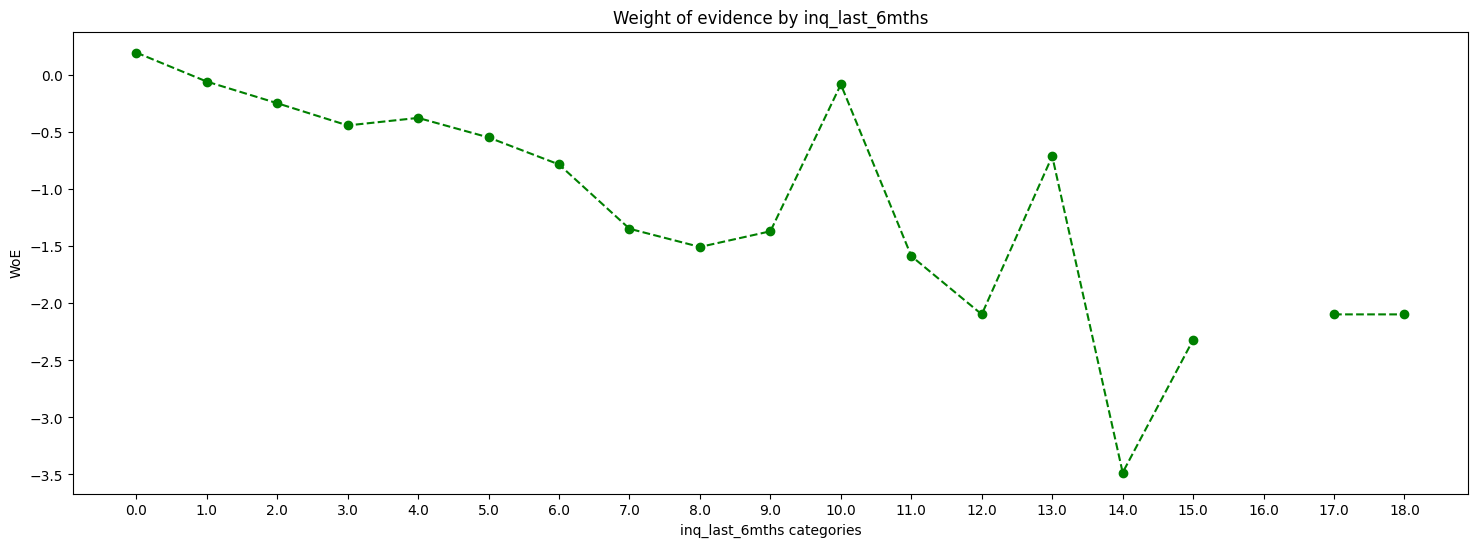

In [481]:
plot_woe(df_temp)

In [482]:
df_inputs_prepr['inq_last_6mths:0'] = np.where((df_inputs_prepr['inq_last_6mths'] == 0), 1, 0)
df_inputs_prepr['inq_last_6mths:1-2'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 1) & (df_inputs_prepr['inq_last_6mths'] <= 2), 1, 0)
df_inputs_prepr['inq_last_6mths:3-6'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 3) & (df_inputs_prepr['inq_last_6mths'] <= 6), 1, 0)
df_inputs_prepr['inq_last_6mths:>6'] = np.where((df_inputs_prepr['inq_last_6mths'] > 6), 1, 0)

# Continuous variable "open_acc"

In [483]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'open_acc', df_targets_prepr)
df_temp

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,open_acc,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,29,0.758621,0.000078,22.0,7.0,0.000066,0.000172,-0.952613,NaN,NaN,inf
1,1.0,110,0.872727,0.000295,96.0,14.0,0.000289,0.000343,-0.172454,0.114107,0.780159,inf
2,2.0,1456,0.845467,0.003903,1231.0,225.0,0.003705,0.005518,-0.398263,0.027260,0.225809,inf
3,3.0,4378,0.873687,0.011736,3825.0,553.0,0.011512,0.013561,-0.163789,0.028220,0.234474,inf
4,4.0,10028,0.891504,0.026883,8940.0,1088.0,0.026907,0.026681,0.008449,0.017817,0.172239,inf
...,...,...,...,...,...,...,...,...,...,...,...,...
56,58.0,1,1.000000,0.000003,1.0,0.0,0.000003,0.000000,inf,0.000000,NaN,inf
57,62.0,1,1.000000,0.000003,1.0,0.0,0.000003,0.000000,inf,0.000000,NaN,inf
58,75.0,1,1.000000,0.000003,1.0,0.0,0.000003,0.000000,inf,0.000000,NaN,inf
59,76.0,2,0.000000,0.000005,0.0,2.0,0.000000,0.000049,-inf,1.000000,inf,inf


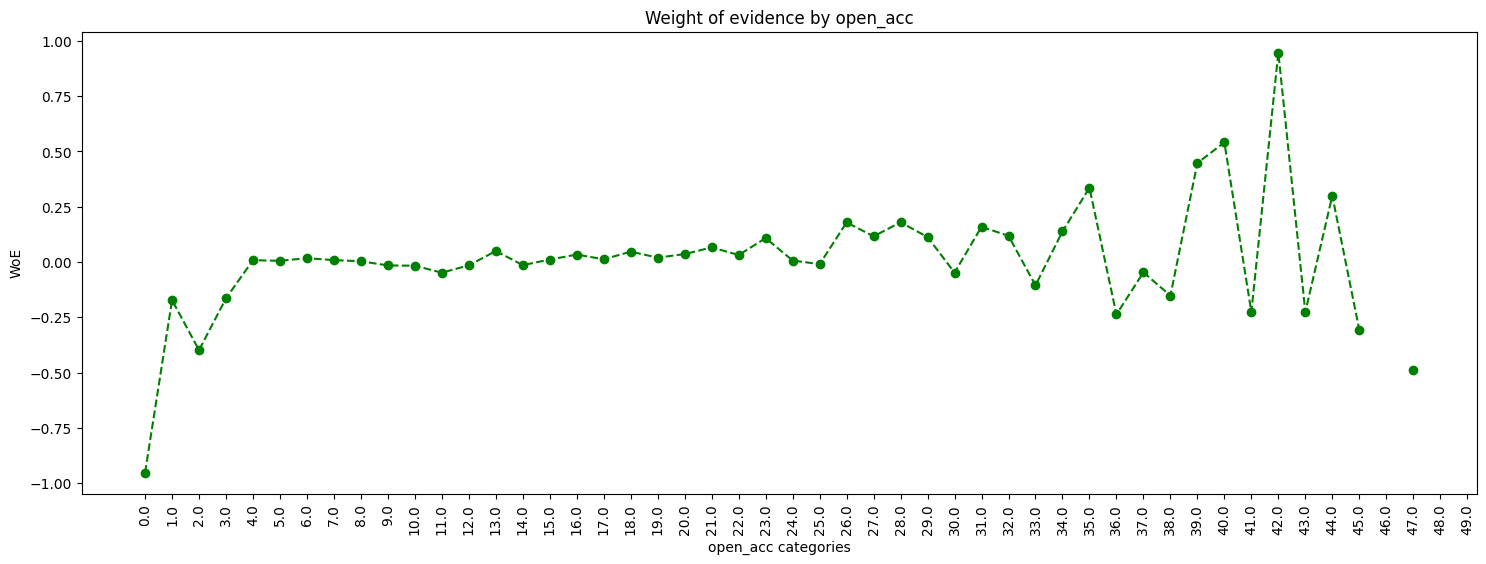

In [484]:
plot_woe(df_temp, 90)

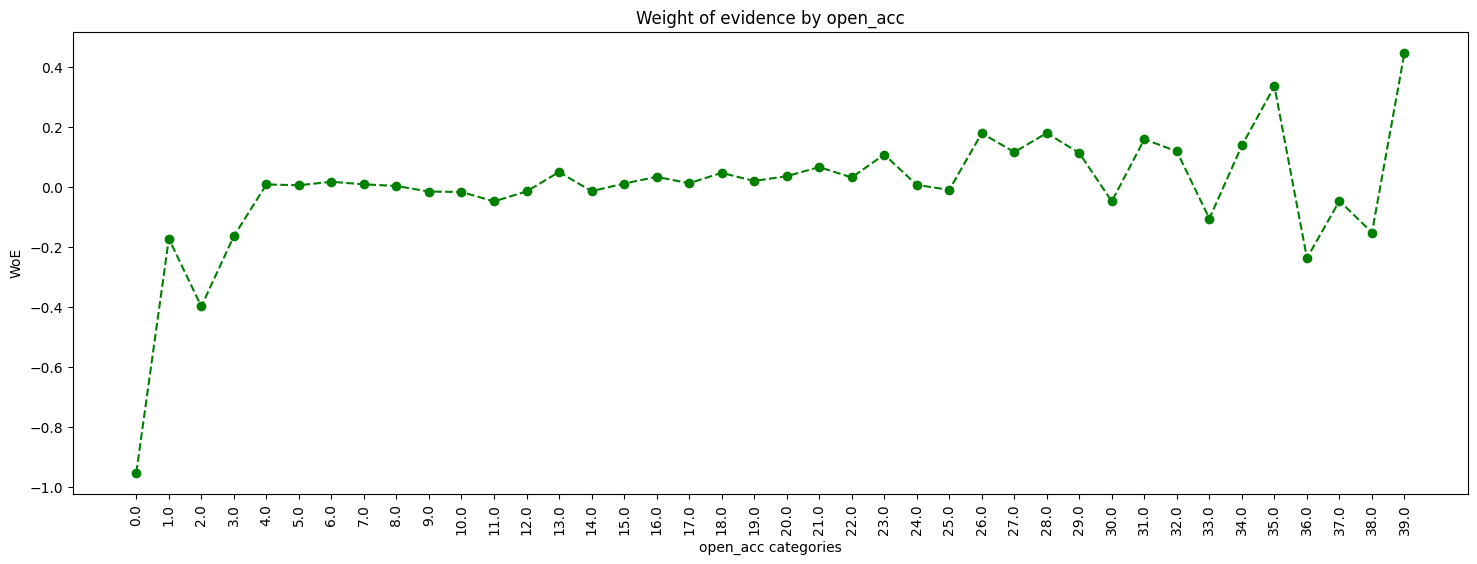

In [485]:
plot_woe(df_temp.iloc[ : 40, :], 90)

In [486]:
df_inputs_prepr['open_acc:0'] = np.where((df_inputs_prepr['open_acc'] == 0), 1, 0)
df_inputs_prepr['open_acc:1-3'] = np.where((df_inputs_prepr['open_acc'] >= 1) & (df_inputs_prepr['open_acc'] <= 3), 1, 0)
df_inputs_prepr['open_acc:4-12'] = np.where((df_inputs_prepr['open_acc'] >= 4) & (df_inputs_prepr['open_acc'] <= 12), 1, 0)
df_inputs_prepr['open_acc:13-17'] = np.where((df_inputs_prepr['open_acc'] >= 13) & (df_inputs_prepr['open_acc'] <= 17), 1, 0)
df_inputs_prepr['open_acc:18-22'] = np.where((df_inputs_prepr['open_acc'] >= 18) & (df_inputs_prepr['open_acc'] <= 22), 1, 0)
df_inputs_prepr['open_acc:23-25'] = np.where((df_inputs_prepr['open_acc'] >= 23) & (df_inputs_prepr['open_acc'] <= 25), 1, 0)
df_inputs_prepr['open_acc:26-30'] = np.where((df_inputs_prepr['open_acc'] >= 26) & (df_inputs_prepr['open_acc'] <= 30), 1, 0)
df_inputs_prepr['open_acc:>=31'] = np.where((df_inputs_prepr['open_acc'] >= 31), 1, 0)

# Continuous variable "pub_rec"

In [487]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'pub_rec', df_targets_prepr)
df_temp

,pub_rec,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,323999,0.889941,0.868565,288340.0,35659.0,0.867840,0.874467,-0.007606,NaN,NaN,inf
1,1.0,42381,0.893419,0.113613,37864.0,4517.0,0.113962,0.110771,0.028408,0.003478,0.036014,inf
2,2.0,4527,0.903247,0.012136,4089.0,438.0,0.012307,0.010741,0.136092,0.009828,0.107684,inf
3,3.0,1280,0.920312,0.003431,1178.0,102.0,0.003546,0.002501,0.348856,0.017065,0.212764,inf
4,4.0,408,0.924020,0.001094,377.0,31.0,0.001135,0.000760,0.400513,0.003707,0.051657,inf
5,5.0,203,0.911330,0.000544,185.0,18.0,0.000557,0.000441,0.232239,0.012690,0.168274,inf
6,6.0,117,0.931624,0.000314,109.0,8.0,0.000328,0.000196,0.514161,0.020294,0.281922,inf
7,7.0,48,0.958333,0.000129,46.0,2.0,0.000138,0.000049,1.037749,0.026709,0.523588,inf
8,8.0,24,1.000000,0.000064,24.0,0.0,0.000072,0.000000,inf,0.041667,inf,inf
9,9.0,14,0.785714,0.000038,11.0,3.0,0.000033,0.000074,-0.798462,0.214286,inf,inf


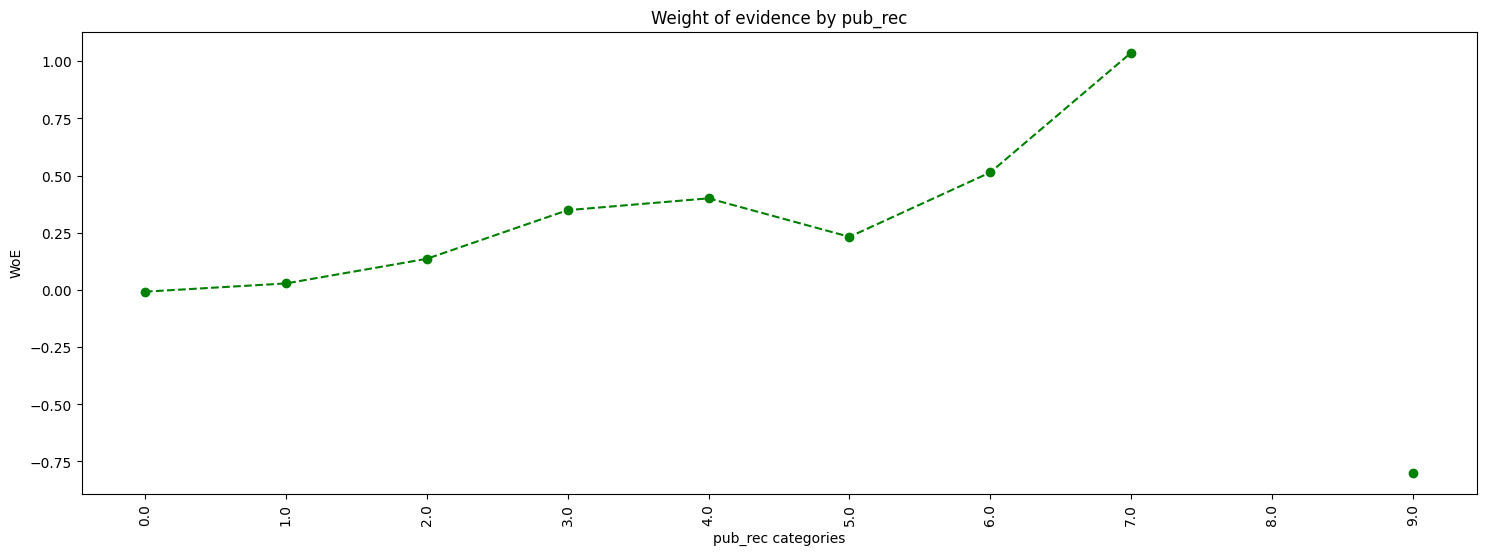

In [489]:
plot_woe(df_temp, 90)

In [490]:
df_inputs_prepr['pub_rec:0-2'] = np.where((df_inputs_prepr['pub_rec'] >= 0) & (df_inputs_prepr['pub_rec'] <= 2), 1, 0)
df_inputs_prepr['pub_rec:3-4'] = np.where((df_inputs_prepr['pub_rec'] >= 3) & (df_inputs_prepr['pub_rec'] <= 4), 1, 0)
df_inputs_prepr['pub_rec:>=5'] = np.where((df_inputs_prepr['pub_rec'] >= 5), 1, 0)

# Continuous variable "total_acc"

In [491]:
df_inputs_prepr['total_acc_factor'] = pd.cut(df_inputs_prepr['total_acc'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'total_acc_factor', df_targets_prepr)
df_temp

/var/folders/2h/rjm2fb_j53gb0nswwgx_xyfc0000gn/T/ipykernel_79302/539786113.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
/var/folders/2h/rjm2fb_j53gb0nswwgx_xyfc0000gn/T/ipykernel_79302/539786113.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)


,total_acc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.15, 3.0]",459,0.810458,0.001230,372.0,87.0,0.001120,0.002134,-0.644759,NaN,NaN,inf
1,"(3.0, 6.0]",6004,0.864757,0.016095,5192.0,812.0,0.015627,0.019913,-0.242371,0.054299,0.402388,inf
2,"(6.0, 9.0]",15047,0.873131,0.040337,13138.0,1909.0,0.039543,0.046814,-0.168816,0.008374,0.073555,inf
3,"(9.0, 12.0]",25169,0.881283,0.067472,22181.0,2988.0,0.066760,0.073275,-0.093113,0.008152,0.075703,inf
4,"(12.0, 15.0]",33651,0.881281,0.090210,29656.0,3995.0,0.089258,0.097969,-0.093124,0.000001,0.000011,inf
5,"(15.0, 18.0]",38711,0.887267,0.103775,34347.0,4364.0,0.103377,0.107018,-0.034619,0.005986,0.058505,inf
6,"(18.0, 21.0]",40599,0.886155,0.108836,35977.0,4622.0,0.108283,0.113345,-0.045693,0.001112,0.011073,inf
7,"(21.0, 24.0]",40163,0.891492,0.107668,35805.0,4358.0,0.107765,0.106871,0.008329,0.005337,0.054022,inf
8,"(24.0, 27.0]",36286,0.895442,0.097274,32492.0,3794.0,0.097794,0.093040,0.049828,0.003950,0.041499,inf
9,"(27.0, 30.0]",31775,0.899103,0.085181,28569.0,3206.0,0.085986,0.078621,0.089553,0.003661,0.039725,inf


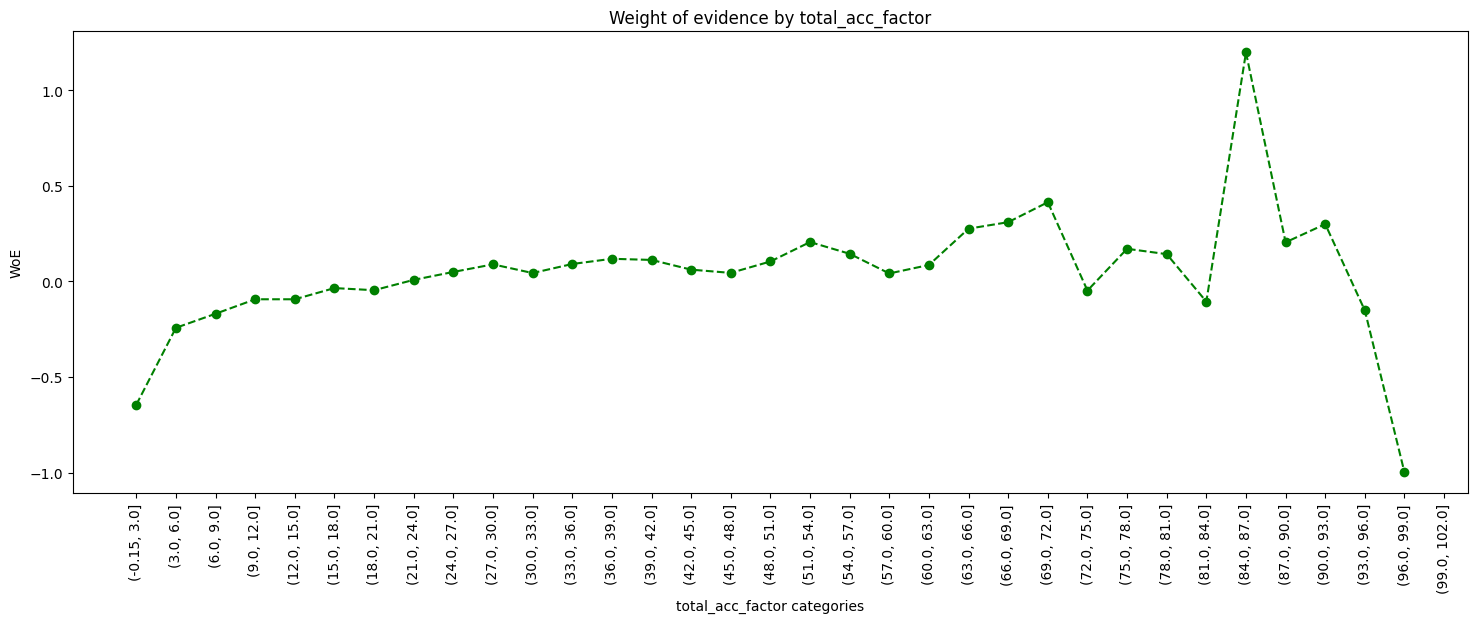

In [492]:
plot_woe(df_temp, 90)

In [493]:
df_inputs_prepr['total_acc:<=27'] = np.where((df_inputs_prepr['total_acc'] <= 27), 1, 0)
df_inputs_prepr['total_acc:28-51'] = np.where((df_inputs_prepr['total_acc'] >= 28) & (df_inputs_prepr['total_acc'] <= 51), 1, 0)
df_inputs_prepr['total_acc:>=52'] = np.where((df_inputs_prepr['total_acc'] >= 52), 1, 0)

# Continuous variable "acc_now_delinq"

In [494]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'acc_now_delinq', df_targets_prepr)
df_temp

,acc_now_delinq,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,371682,0.890648,0.996392,331038.0,40644.0,0.996352,0.996714,-0.000363,NaN,NaN,inf
1,1.0,1263,0.899446,0.003386,1136.0,127.0,0.003419,0.003114,0.093337,0.008797,0.093700,inf
2,2.0,70,0.928571,0.000188,65.0,5.0,0.000196,0.000123,0.467204,0.029126,0.373868,inf
3,3.0,7,0.857143,0.000019,6.0,1.0,0.000018,0.000025,-0.305986,0.071429,0.773190,inf
4,4.0,4,1.000000,0.000011,4.0,0.0,0.000012,0.000000,inf,0.142857,inf,inf
5,5.0,2,0.500000,0.000005,1.0,1.0,0.000003,0.000025,-2.097745,0.500000,inf,inf


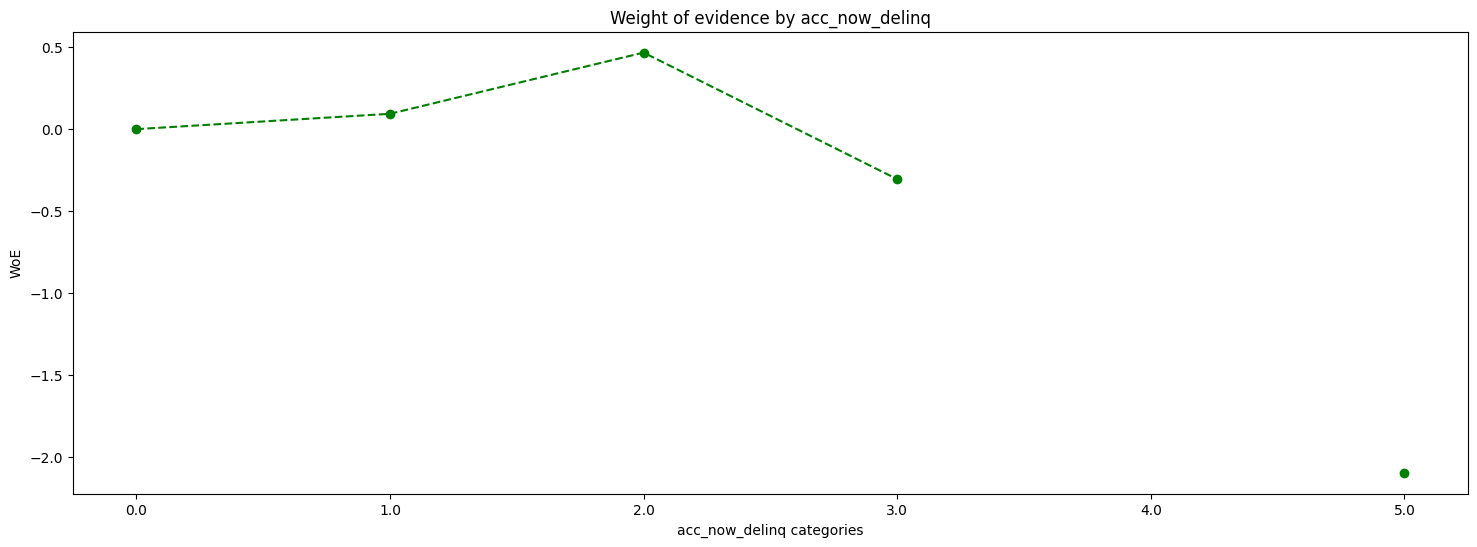

In [495]:
plot_woe(df_temp)

In [496]:
df_inputs_prepr['acc_now_delinq:0'] = np.where((df_inputs_prepr['acc_now_delinq'] == 0), 1, 0)
df_inputs_prepr['acc_now_delinq:>=1'] = np.where((df_inputs_prepr['acc_now_delinq'] >= 1), 1, 0)

# Continuous variable "total_rev_hi_lim_factor"

In [498]:
df_inputs_prepr['total_rev_hi_lim_factor'] = pd.cut(df_inputs_prepr['total_rev_hi_lim'], 2000)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'total_rev_hi_lim_factor', df_targets_prepr)
df_temp

/var/folders/2h/rjm2fb_j53gb0nswwgx_xyfc0000gn/T/ipykernel_79302/539786113.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
/var/folders/2h/rjm2fb_j53gb0nswwgx_xyfc0000gn/T/ipykernel_79302/539786113.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = g

,total_rev_hi_lim_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-9999.999, 5000.0]",19417,0.866457,0.052052,16824.0,2593.0,0.050637,0.063588,-0.227754,NaN,NaN,inf
1,"(5000.0, 9999.999]",52655,0.876194,0.141156,46136.0,6519.0,0.138859,0.159866,-0.140872,0.009737,0.086882,inf
2,"(9999.999, 14999.998]",59570,0.880376,0.159693,52444.0,7126.0,0.157845,0.174751,-0.101749,0.004182,0.039123,inf
3,"(14999.998, 19999.998]",51455,0.877582,0.137939,45156.0,6299.0,0.135910,0.154471,-0.128013,0.002794,0.026264,inf
4,"(19999.998, 24999.997]",41582,0.885792,0.111472,36833.0,4749.0,0.110859,0.116460,-0.049285,0.008210,0.078728,inf
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,"(9974999.002, 9979999.002]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
1996,"(9979999.002, 9984999.002]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
1997,"(9984999.002, 9989999.001]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
1998,"(9989999.001, 9994999.0]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf


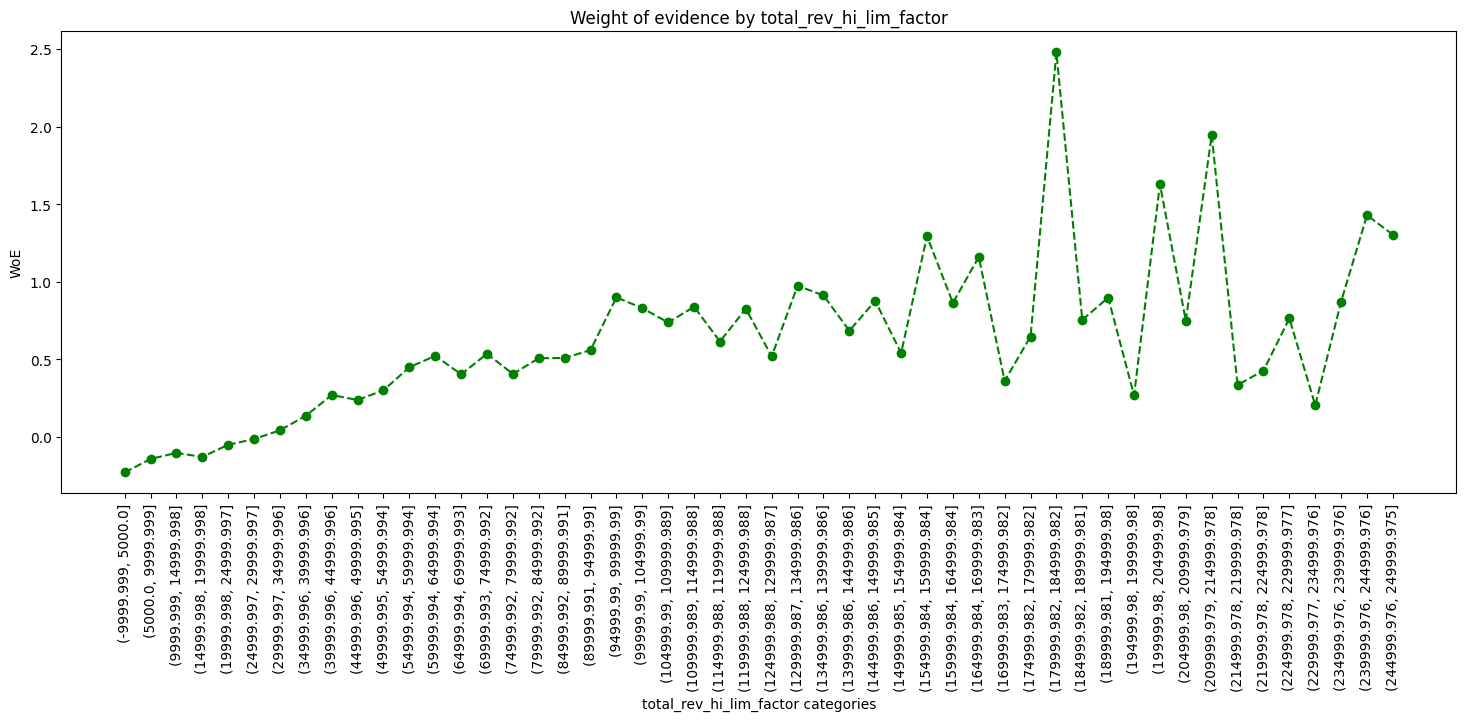

In [499]:
plot_woe(df_temp.iloc[: 50, : ], 90)

In [500]:
df_inputs_prepr['total_rev_hi_lim:<=5K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] <= 5000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:5K-10K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 5000) & (df_inputs_prepr['total_rev_hi_lim'] <= 10000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:10K-20K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 10000) & (df_inputs_prepr['total_rev_hi_lim'] <= 20000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:20K-30K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 20000) & (df_inputs_prepr['total_rev_hi_lim'] <= 30000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:30K-40K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 30000) & (df_inputs_prepr['total_rev_hi_lim'] <= 40000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:40K-55K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 40000) & (df_inputs_prepr['total_rev_hi_lim'] <= 55000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:55K-95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 55000) & (df_inputs_prepr['total_rev_hi_lim'] <= 95000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:>95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 95000), 1, 0)

In [501]:
df_inputs_prepr['installment_factor'] = pd.cut(df_inputs_prepr['installment'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'installment_factor', df_targets_prepr)
df_temp

/var/folders/2h/rjm2fb_j53gb0nswwgx_xyfc0000gn/T/ipykernel_79302/539786113.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
/var/folders/2h/rjm2fb_j53gb0nswwgx_xyfc0000gn/T/ipykernel_79302/539786113.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)


,installment_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(14.276, 43.556]",1812,0.906181,0.004858,1642.0,170.0,0.004942,0.004169,0.170127,NaN,NaN,0.013497
1,"(43.556, 71.443]",4841,0.897542,0.012978,4345.0,496.0,0.013078,0.012163,0.072460,0.008639,0.097667,0.013497
2,"(71.443, 99.329]",6824,0.893025,0.018294,6094.0,730.0,0.018342,0.017902,0.024270,0.004517,0.048190,0.013497
3,"(99.329, 127.216]",9138,0.890348,0.024497,8136.0,1002.0,0.024488,0.024572,-0.003444,0.002677,0.027715,0.013497
4,"(127.216, 155.102]",10040,0.896514,0.026915,9001.0,1039.0,0.027091,0.025479,0.061332,0.006166,0.064776,0.013497
5,"(155.102, 182.988]",16816,0.894208,0.045080,15037.0,1779.0,0.045258,0.043626,0.036717,0.002306,0.024615,0.013497
6,"(182.988, 210.875]",17216,0.904798,0.046152,15577.0,1639.0,0.046883,0.040193,0.153964,0.010590,0.117247,0.013497
7,"(210.875, 238.761]",15090,0.900398,0.040453,13587.0,1503.0,0.040894,0.036858,0.103905,0.004400,0.050059,0.013497
8,"(238.761, 266.648]",18842,0.901391,0.050511,16984.0,1858.0,0.051118,0.045564,0.115026,0.000993,0.011121,0.013497
9,"(266.648, 294.534]",20100,0.891095,0.053883,17911.0,2189.0,0.053908,0.053681,0.004225,0.010296,0.110801,0.013497
